 # <font color=purple>__Inequity in health service delivery__</font>

Cancer has a major impact on society in the United States and across the world. 
Acording to NCI - National Cancer Institute, in 2024, an estimated 2,001,140 new cases of cancer will be diagnosed in the United States and 611,720 people will die from the disease. 
The most common cancer according to estimated new cases in 2024 is __breast cancer__ . 
__Metastatic breast cancer__ (also called stage IV or advanced breast cancer) is the most advanced stage of breast cancer. 
Acording to Fox Chase Cancer Center, men can develop breast cancer, but this disease is about __100 times more__ common among __women__ than men.

 ### <font color=green>__Project porpose__</font>

Investigating factors contributing to delays in initiating metastatic breast cancer treatment. <br>
Highlight barriers such as access to healthcare services, diagnostic delays, or treatment decision-making processes. <br>
Analyze disparities in treatment initiation times across demographic and socioeconomic groups so that can be advocate for policies aimed at ensuring equitable access to timely treatment, particularly for underserved populations.


⭐⭐⭐⭐⭐⭐⭐⭐⭐⭐⭐⭐⭐⭐⭐⭐⭐⭐⭐⭐⭐⭐⭐⭐⭐⭐⭐⭐⭐⭐⭐⭐⭐⭐⭐⭐⭐⭐⭐⭐⭐⭐⭐⭐⭐⭐⭐⭐⭐⭐⭐⭐⭐

<table>
<tr>
<th> Columns </th>
<th> Columns </th>
<th> Columns </th>
<th> Columns </th>
</tr>
<tr>
<td>

```patient_race  
payer_type  
patient_state  
patient_zip3  
patient_age  
patient_gender  
bmi  
breast_cancer_diagnosis_code  
breast_cancer_diagnosis_desc  
breast_cancer_diagnosis_year  
metastatic_cancer_diagnosis_code  
metastatic_first_treatment  
metastatic_first_treatment_type  
metastatic_first_novel_treatment  
metastatic_first_novel_treatment_type  
region  
division  
population  
density  
age_median  
male  
female  
```
</td>
<td>

```married  
family_size  
income_household_median  
income_household_six_figure  
home_ownership  
housing_units  
home_value  
rent_median  
education_college_or_above  
labor_force_participation  
unemployment_rate  
race_white  
race_black  
race_asian  
race_native  
race_pacific  
race_other  
race_multiple  
hispanic  
age_under_10  
```
</td>
<td>

```age_10_to_19  
age_20s  
age_30s  
age_40s  
age_50s  
age_60s  
age_70s  
age_over_80  
divorced  
never_married  
widowed  
family_dual_income  
income_household_under_5  
income_household_5_to_10  
income_household_10_to_15  
income_household_15_to_20  
income_household_20_to_25  
income_household_25_to_35  
income_household_35_to_50  
income_household_50_to_75  
```
</td>
<td>

```income_household_75_to_100  
income_household_100_to_150  
income_household_150_over  
income_individual_median  
poverty  
rent_burden  
education_less_highschool  
education_highschool  
education_some_college  
education_bachelors  
education_graduate  
education_stem_degree  
self_employed  
farmer  
disabled  
limited_english  
commute_time  
health_uninsured  
veteran  
treatment_pd
```

</td>
</tr>
</table>

## __Install and import__

In [2]:
!pip install category_encoders 
!pip install tqdm
!pip install tabulate
!pip install --upgrade nbformat
!pip install autogluon.tabular==1.1.0b20240411
!pip install openfe==0.0.12
!pip install shap

Defaulting to user installation because normal site-packages is not writeable



[notice] A new release of pip is available: 23.2.1 -> 24.1
[notice] To update, run: python.exe -m pip install --upgrade pip


Defaulting to user installation because normal site-packages is not writeable



[notice] A new release of pip is available: 23.2.1 -> 24.1
[notice] To update, run: python.exe -m pip install --upgrade pip


Defaulting to user installation because normal site-packages is not writeable


[notice] A new release of pip is available: 23.2.1 -> 24.1
[notice] To update, run: python.exe -m pip install --upgrade pip



Defaulting to user installation because normal site-packages is not writeable



[notice] A new release of pip is available: 23.2.1 -> 24.1
[notice] To update, run: python.exe -m pip install --upgrade pip


Defaulting to user installation because normal site-packages is not writeable



[notice] A new release of pip is available: 23.2.1 -> 24.1
[notice] To update, run: python.exe -m pip install --upgrade pip


Defaulting to user installation because normal site-packages is not writeable


[notice] A new release of pip is available: 23.2.1 -> 24.1
[notice] To update, run: python.exe -m pip install --upgrade pip



Defaulting to user installation because normal site-packages is not writeable



[notice] A new release of pip is available: 23.2.1 -> 24.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [3]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
%matplotlib inline
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.linear_model import Lasso
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.impute import SimpleImputer
from sklearn.metrics import confusion_matrix
import category_encoders as ce
import plotly.express as px
from tqdm.notebook import tqdm
from statsmodels.stats.diagnostic import acorr_ljungbox
import warnings
warnings.filterwarnings("ignore")
from tabulate import tabulate
from sklearn.linear_model import LogisticRegression
from collections import Counter
import seaborn as sns
import tqdm
import gc 
pd.set_option('display.max_columns', None)
pd.set_option('display.width', 100)
pd.set_option('display.max_rows', 200)
pd.set_option('display.float_format', lambda x: '%.3f' % x)

from Missing_values import *
from Graphs import *
from Model_Run import *

 ## <font color=purple>__DATASETS READING__</font>

In [4]:
#Data set reading
#Data sets have already been split, using about 30% for testing and 70% for training.

train_data = pd.read_csv('train.csv')
test_data = pd.read_csv('test.csv')
print(train_data.shape)
print(test_data.shape)

(27674, 83)
(11845, 82)


In [5]:
# Display the first records in the train set
train_data.head()

,patient_id,patient_race,payer_type,patient_state,patient_zip3,patient_age,patient_gender,bmi,breast_cancer_diagnosis_code,breast_cancer_diagnosis_desc,breast_cancer_diagnosis_year,metastatic_cancer_diagnosis_code,metastatic_first_treatment,metastatic_first_treatment_type,metastatic_first_novel_treatment,metastatic_first_novel_treatment_type,region,division,population,density,age_median,age_under_10,age_10_to_19,age_20s,age_30s,age_40s,age_50s,age_60s,age_70s,age_over_80,male,female,married,divorced,never_married,widowed,family_size,family_dual_income,income_household_median,income_household_under_5,income_household_5_to_10,income_household_10_to_15,income_household_15_to_20,income_household_20_to_25,income_household_25_to_35,income_household_35_to_50,income_household_50_to_75,income_household_75_to_100,income_household_100_to_150,income_household_150_over,income_household_six_figure,income_individual_median,home_ownership,housing_units,home_value,rent_median,rent_burden,education_less_highschool,education_highschool,education_some_college,education_bachelors,education_graduate,education_college_or_above,education_stem_degree,labor_force_participation,unemployment_rate,self_employed,farmer,race_white,race_black,race_asian,race_native,race_pacific,race_other,race_multiple,hispanic,disabled,poverty,limited_english,commute_time,health_uninsured,veteran,treatment_pd
0,994155,Asian,COMMERCIAL,CA,917,46,F,27.000,C50811,Malignant neoplasm of ovrlp sites of right fem...,2018,C779,DOXORUBICIN HCL,NaN,NaN,NaN,West,Pacific,43031,2048.578,38.852,11.307,12.898,14.122,13.533,13.161,13.378,11.474,6.380,3.737,49.052,50.948,48.504,10.117,36.409,4.970,3.675,59.220,86330.391,2.226,1.528,2.898,2.748,3.174,6.648,9.617,15.965,13.589,19.752,21.848,41.600,34317.826,61.398,12609.261,572606.500,1778.000,34.596,17.491,22.657,29.263,20.200,10.404,30.604,46.209,63.154,6.198,15.709,0.015,38.709,3.963,25.565,1.193,0.270,18.859,11.426,47.726,9.896,10.515,12.746,32.530,7.263,3.811,35
1,154389,NaN,MEDICARE ADVANTAGE,OH,451,63,F,NaN,C50412,Malig neoplasm of upper-outer quadrant of left...,2018,C7951,DOXORUBICIN HCL,NaN,NaN,NaN,Midwest,East North Central,7228,194.656,41.248,12.855,12.789,11.262,10.489,11.860,15.279,13.360,6.434,5.664,52.091,47.909,50.672,14.102,27.117,8.113,3.120,51.228,65214.721,2.330,3.249,4.468,5.879,5.323,7.840,12.247,20.040,14.051,15.677,8.902,24.579,32142.227,72.391,2789.958,155901.769,828.000,26.514,15.830,38.968,27.683,11.626,5.887,17.513,38.309,61.272,5.793,11.203,3.715,96.055,1.006,0.321,0.117,0.002,0.255,2.234,1.183,18.317,13.547,0.147,31.891,7.632,9.632,33
2,387343,NaN,COMMERCIAL,TX,773,53,F,NaN,C50212,Malig neoplasm of upper-inner quadrant of left...,2018,C773,PACLITAXEL,Antineoplastics,NaN,NaN,South,West South Central,24751,352.227,41.371,11.930,12.987,10.996,11.162,13.108,13.023,13.066,9.577,4.158,49.355,50.645,52.994,13.342,25.094,8.579,3.206,47.794,77147.408,3.198,2.358,3.423,3.825,3.974,8.425,12.402,16.906,12.472,15.155,17.849,33.004,37016.740,74.060,8450.339,213648.022,1207.696,28.148,13.257,29.300,31.066,17.632,8.743,26.375,45.467,57.926,5.423,13.245,2.300,76.874,8.906,2.268,0.381,0.060,3.589,7.915,21.064,14.083,11.943,2.549,32.556,16.396,10.392,24
3,921275,Hispanic,MEDICAID,CA,928,50,F,NaN,1749,"Malignant neoplasm of breast (female), unspeci...",2015,C787,GEMCITABINE HCL,NaN,NaN,NaN,West,Pacific,39122,2295.939,38.200,11.879,13.355,14.230,13.418,13.333,14.061,10.248,5.952,3.503,49.894,50.106,50.245,9.827,35.291,4.652,3.623,61.736,102741.636,2.327,1.536,2.648,2.179,2.409,5.164,7.973,13.936,12.470,19.761,29.597,49.358,41287.273,61.464,11725.667,677688.515,2003.125,34.753,14.230,19.988,29.797,23.739,12.245,35.985,47.918,65.230,5.103,15.224,0.027,54.030,2.527,20.827,0.588,0.300,11.645,10.082,37.948,8.958,10.109,8.058,30.606,7.018,4.103,455
4,803454,NaN,COMMERCIAL,NY,112,39,F,18.000,1749,"Malignant neoplasm of breast (female), unspeci...",2015,C7989,DOXORUBICIN HCL,NaN,NaN,NaN,Northeast,Middle Atlantic,71374,17326.408,36.476,12.98

In [ ]:
# Display variable types
# print(train_data.info())

# <font color=black>__About data sets__</font>

In [6]:
#describe train set
train_data.describe()

,patient_id,patient_zip3,patient_age,bmi,breast_cancer_diagnosis_year,population,density,age_median,age_under_10,age_10_to_19,age_20s,age_30s,age_40s,age_50s,age_60s,age_70s,age_over_80,male,female,married,divorced,never_married,widowed,family_size,family_dual_income,income_household_median,income_household_under_5,income_household_5_to_10,income_household_10_to_15,income_household_15_to_20,income_household_20_to_25,income_household_25_to_35,income_household_35_to_50,income_household_50_to_75,income_household_75_to_100,income_household_100_to_150,income_household_150_over,income_household_six_figure,income_individual_median,home_ownership,housing_units,home_value,rent_median,rent_burden,education_less_highschool,education_highschool,education_some_college,education_bachelors,education_graduate,education_college_or_above,education_stem_degree,labor_force_participation,unemployment_rate,self_employed,farmer,race_white,race_black,race_asian,race_native,race_pacific,race_other,race_multiple,hispanic,disabled,poverty,limited_english,commute_time,health_uninsured,veteran,treatment_pd
count,27674.000,27674.000,27674.000,8749.000,27674.000,27674.000,27674.000,27674.000,27674.000,27674.000,27674.000,27674.000,27674.000,27674.000,27674.000,27674.000,27674.000,27674.000,27674.000,27674.000,27674.000,27674.000,27674.000,27671.000,27671.000,27671.000,27671.000,27671.000,27671.000,27671.000,27671.000,27671.000,27671.000,27671.000,27671.000,27671.000,27671.000,27671.000,27674.000,27671.000,27674.000,27671.000,27671.000,27671.000,27674.000,27674.000,27674.000,27674.000,27674.000,27674.000,27674.000,27674.000,27674.000,25482.000,25482.000,27674.000,27674.000,27674.000,27674.000,27674.000,27674.000,27674.000,27674.000,27674.000,27671.000,27671.000,27674.000,27674.000,27674.000,27674.000
mean,549586.829,522.025,54.456,29.278,2016.486,19919.851,1655.023,40.674,11.117,12.884,13.143,12.782,12.077,13.573,12.703,7.704,4.016,50.040,49.960,48.005,12.644,33.461,5.889,3.193,51.840,75077.506,3.281,2.545,4.131,3.943,4.080,8.384,11.467,16.723,12.623,15.799,17.023,32.822,36950.665,66.651,7329.758,323131.260,1224.420,31.276,11.817,27.984,28.494,19.315,12.392,31.706,43.252,61.655,5.968,12.999,2.053,70.338,11.692,5.166,0.855,0.122,5.352,6.474,17.863,13.433,13.324,4.603,28.062,8.574,7.080,134.218
std,260306.291,292.405,11.202,5.637,1.059,13465.789,3639.259,4.026,1.535,1.881,3.235,2.386,1.242,1.673,2.560,2.150,1.229,1.646,1.646,7.429,2.089,7.861,1.545,0.218,7.084,22012.395,1.651,1.495,1.859,1.531,1.410,2.298,2.660,2.810,1.957,3.316,9.412,11.690,9080.017,14.198,4852.472,235795.496,422.174,4.761,5.176,7.944,5.095,6.422,6.198,12.181,4.553,6.106,2.014,3.266,3.272,17.751,12.606,6.386,2.583,0.477,5.955,3.539,17.514,3.802,5.724,6.595,4.893,4.307,3.099,187.760
min,100051.000,6.000,19.000,14.000,2015.000,636.000,0.822,20.600,0.000,6.314,5.925,1.500,0.800,0.000,0.200,0.000,0.000,39.725,38.400,0.900,0.200,13.440,0.000,2.550,19.312,18465.409,0.712,0.362,0.647,1.028,0.840,1.860,1.700,4.950,3.100,1.672,0.840,3.437,4316.000,15.850,0.000,43163.625,448.400,16.692,0.000,0.000,7.200,2.466,2.094,7.049,23.915,30.700,0.987,2.263,0.000,1.640,0.041,0.000,0.000,0.000,0.003,0.433,0.061,4.600,3.433,0.000,12.461,1.165,1.200,0.000
25%,323742.250,294.000,47.000,25.000,2016.000,9080.000,169.323,37.734,10.149,11.788,10.996,11.203,11.354,12.386,10.688,6.075,3.288,49.067,49.093,43.271,11.066,27.407,4.766,3.030,47.719,60923.483,2.184,1.512,2.810,2.781,3.035,6.763,9.695,15.188,11.360,13.600,9.991,24.400,31232.795,56.905,3377.163,164127.909,891.741,28.340,7.873,22.503,25.218,13.932,7.501,21.718,40.083,57.926,4.759,10.756,0.053,58.292,2.406,1.044,0.195,0.022,1.307,3.893,4.609,10.270,9.341,0.981,24.968,5.497,4.972,36.000
50%,549720.000,490.000,55.000,28.820,2016.000,18355.000,627.904,40.762,11.022,12.924,12.426,12.367,12.137,13.644,12.620,7.382,3.825,49.929,50.071,49.873,12.653,31.880,5.600,3.160,52.656,70760.741,2.826,2.171,3.710,3.750,4.003,8.425,11.710,16.979,12.666,16.016,14.772,30.658,35526.818,7

In [7]:
train_missing_percentages = get_missing_percentages(train_data)
test_missing_percentages = get_missing_percentages(test_data)


train_missing_df = pd.DataFrame({'Variable': train_missing_percentages.index,
                                 'Missing Percentage (Train)': train_missing_percentages.values})
test_missing_df = pd.DataFrame({'Variable': test_missing_percentages.index,
                                'Missing Percentage (Test)': test_missing_percentages.values})


missing_df = pd.merge(train_missing_df, test_missing_df, on='Variable', how='outer')
print(tabulate(missing_df, headers='keys', tablefmt='pretty'))

+---+---------------------------------------+----------------------------+---------------------------+
|   |               Variable                | Missing Percentage (Train) | Missing Percentage (Test) |
+---+---------------------------------------+----------------------------+---------------------------+
| 0 |   metastatic_first_novel_treatment    |     99.15805449158054      |     99.18953144786829     |
| 1 | metastatic_first_novel_treatment_type |     99.15805449158054      |     99.18953144786829     |
| 2 |                  bmi                  |     68.38548818385487      |     68.48459265512875     |
+---+---------------------------------------+----------------------------+---------------------------+


 # <font color=green>__Graphics__</font>

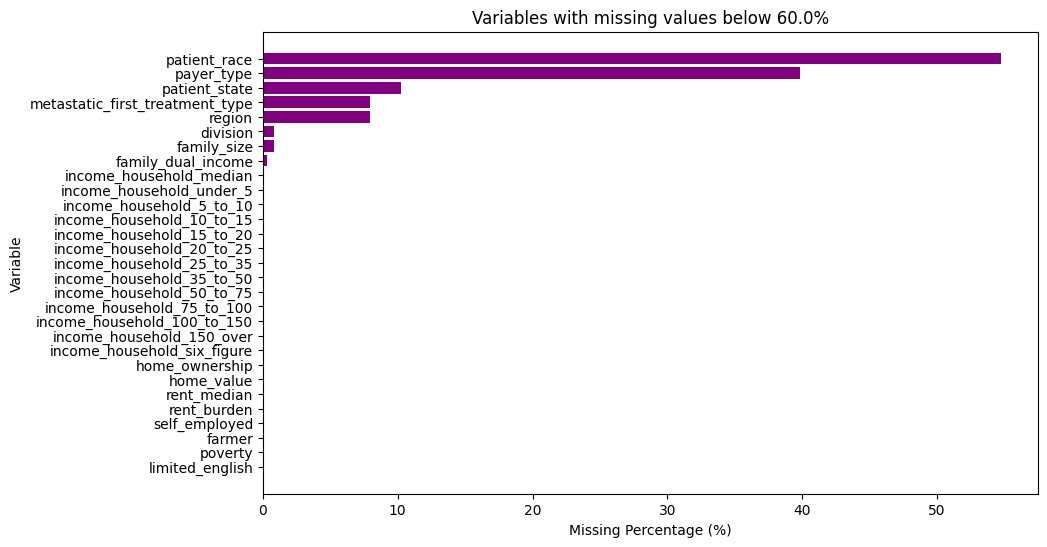

In [8]:
plot_missing_values(train_data, 0.6)

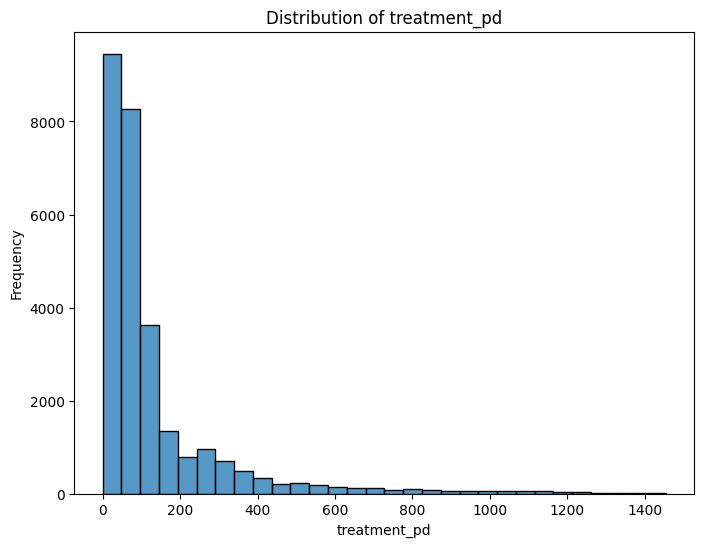

In [9]:
plot_histogram(train_data, 'treatment_pd')

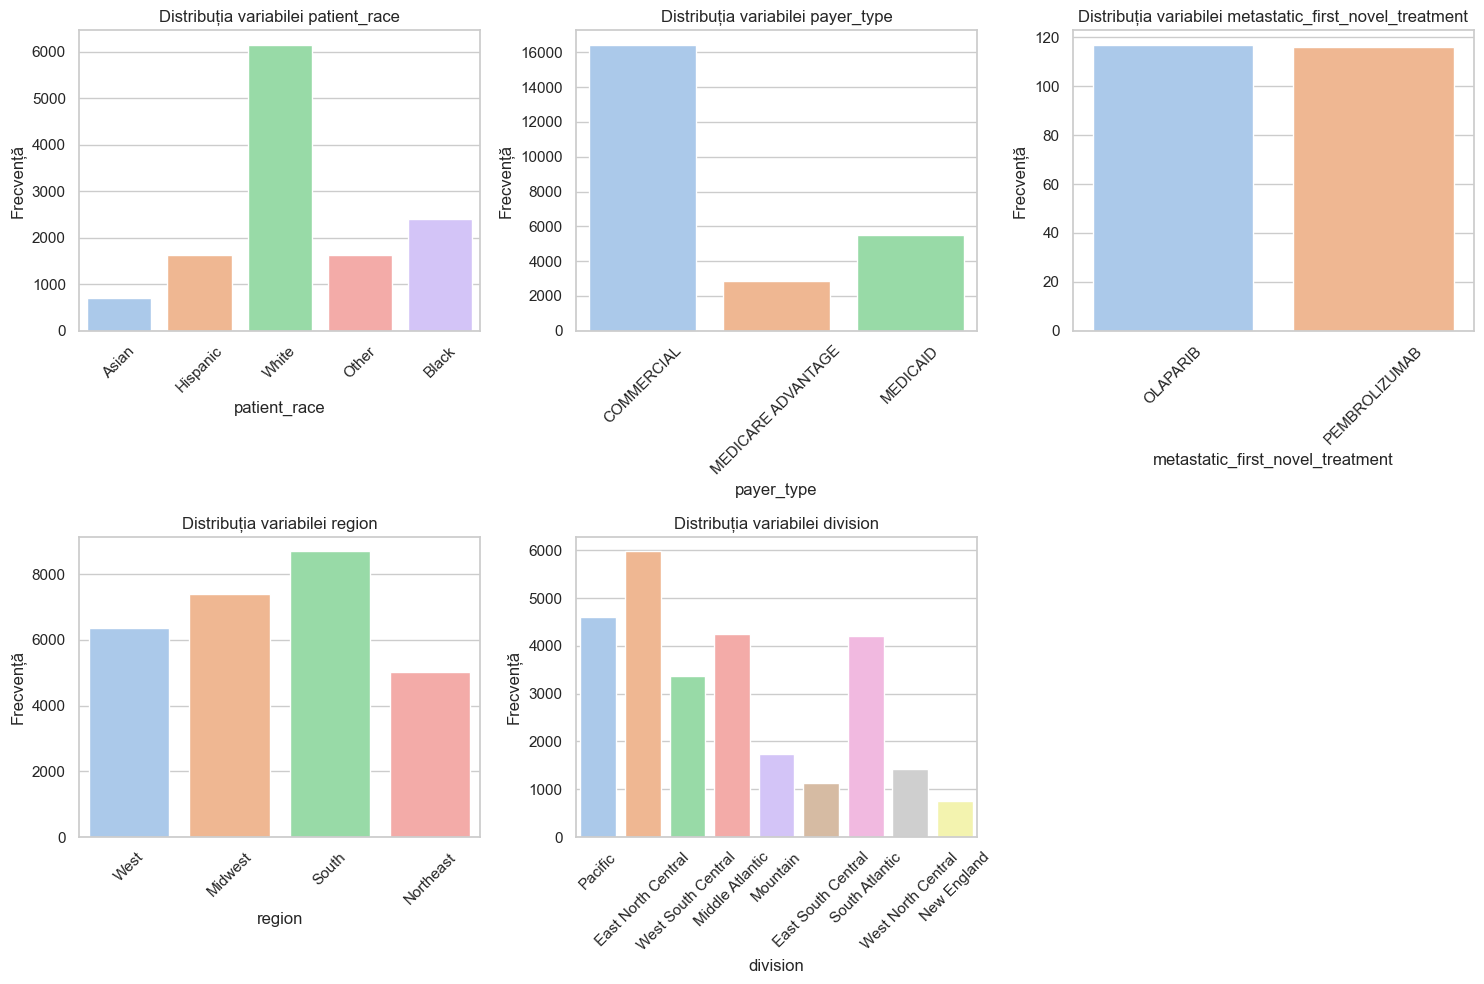

In [10]:
categorical_variables = ['patient_race', 'payer_type', 'metastatic_first_novel_treatment', 'region', 'division']
plot_categorical_distribution(train_data, categorical_variables)

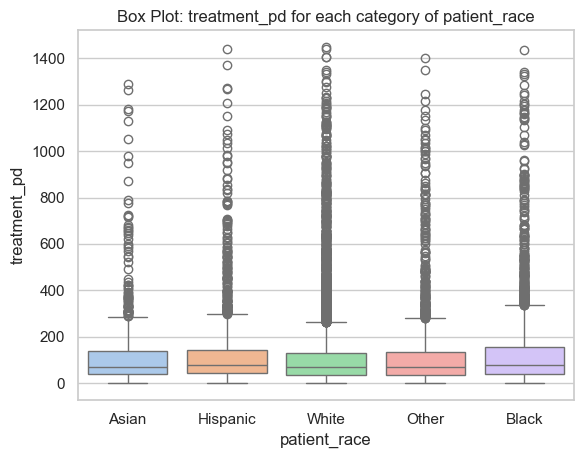

In [11]:
subset_data = train_data[['patient_race', 'treatment_pd']]
plot_boxplot(subset_data, 'patient_race', 'treatment_pd')

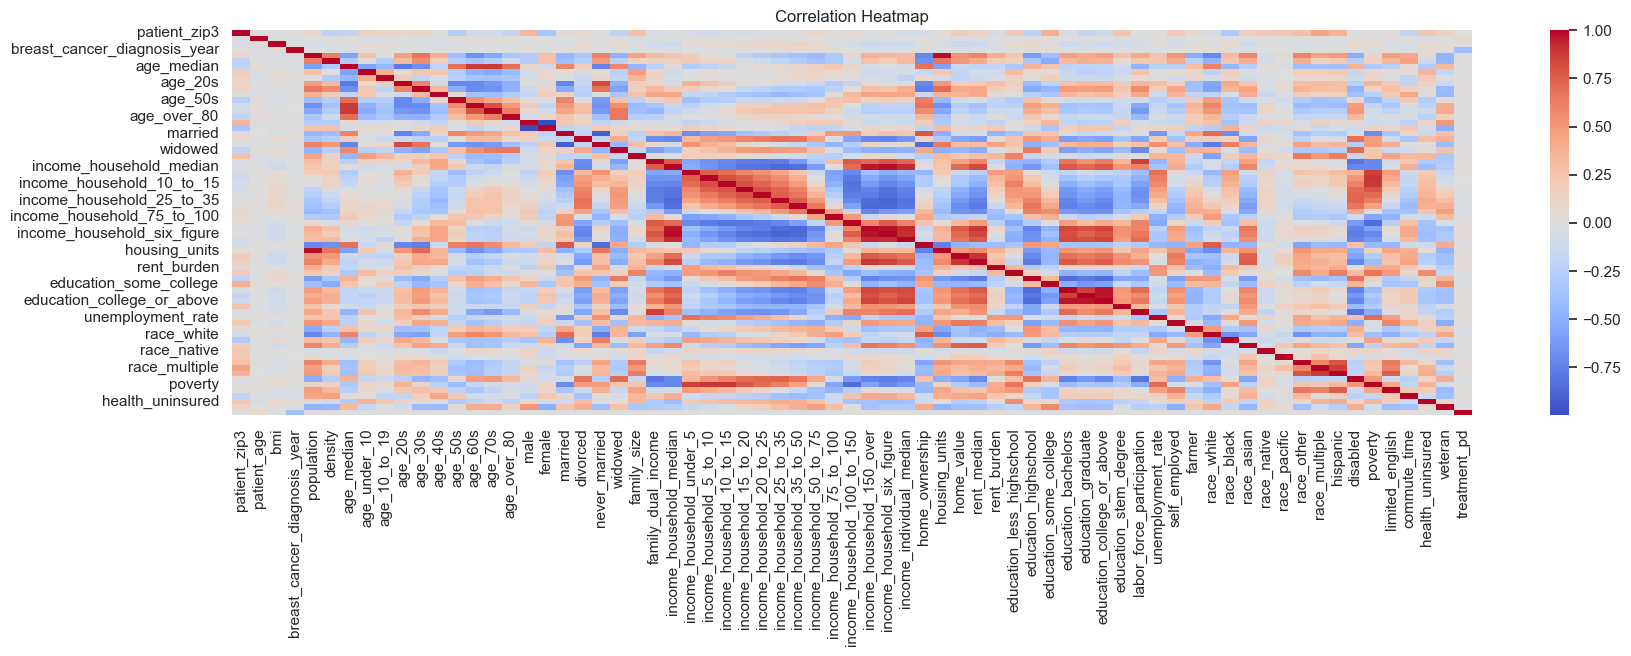

In [37]:
plot_correlation_heatmap(train_data.drop(['patient_id'], axis=1).select_dtypes(exclude='object'))



 ### <font color=red>__Categorical and numeric features__</font>

In [13]:
# Separate numerical and categorical columns
# Select numerical columns excluding 'patient_zip3'
numerical_cols = train_data.select_dtypes(exclude=['object']).columns
numerical_cols = numerical_cols.drop('patient_zip3')

# Select categorical columns including 'patient_zip3'
categorical_cols = train_data.select_dtypes(include=['object']).columns
categorical_cols = categorical_cols.append(pd.Index(['patient_zip3']))

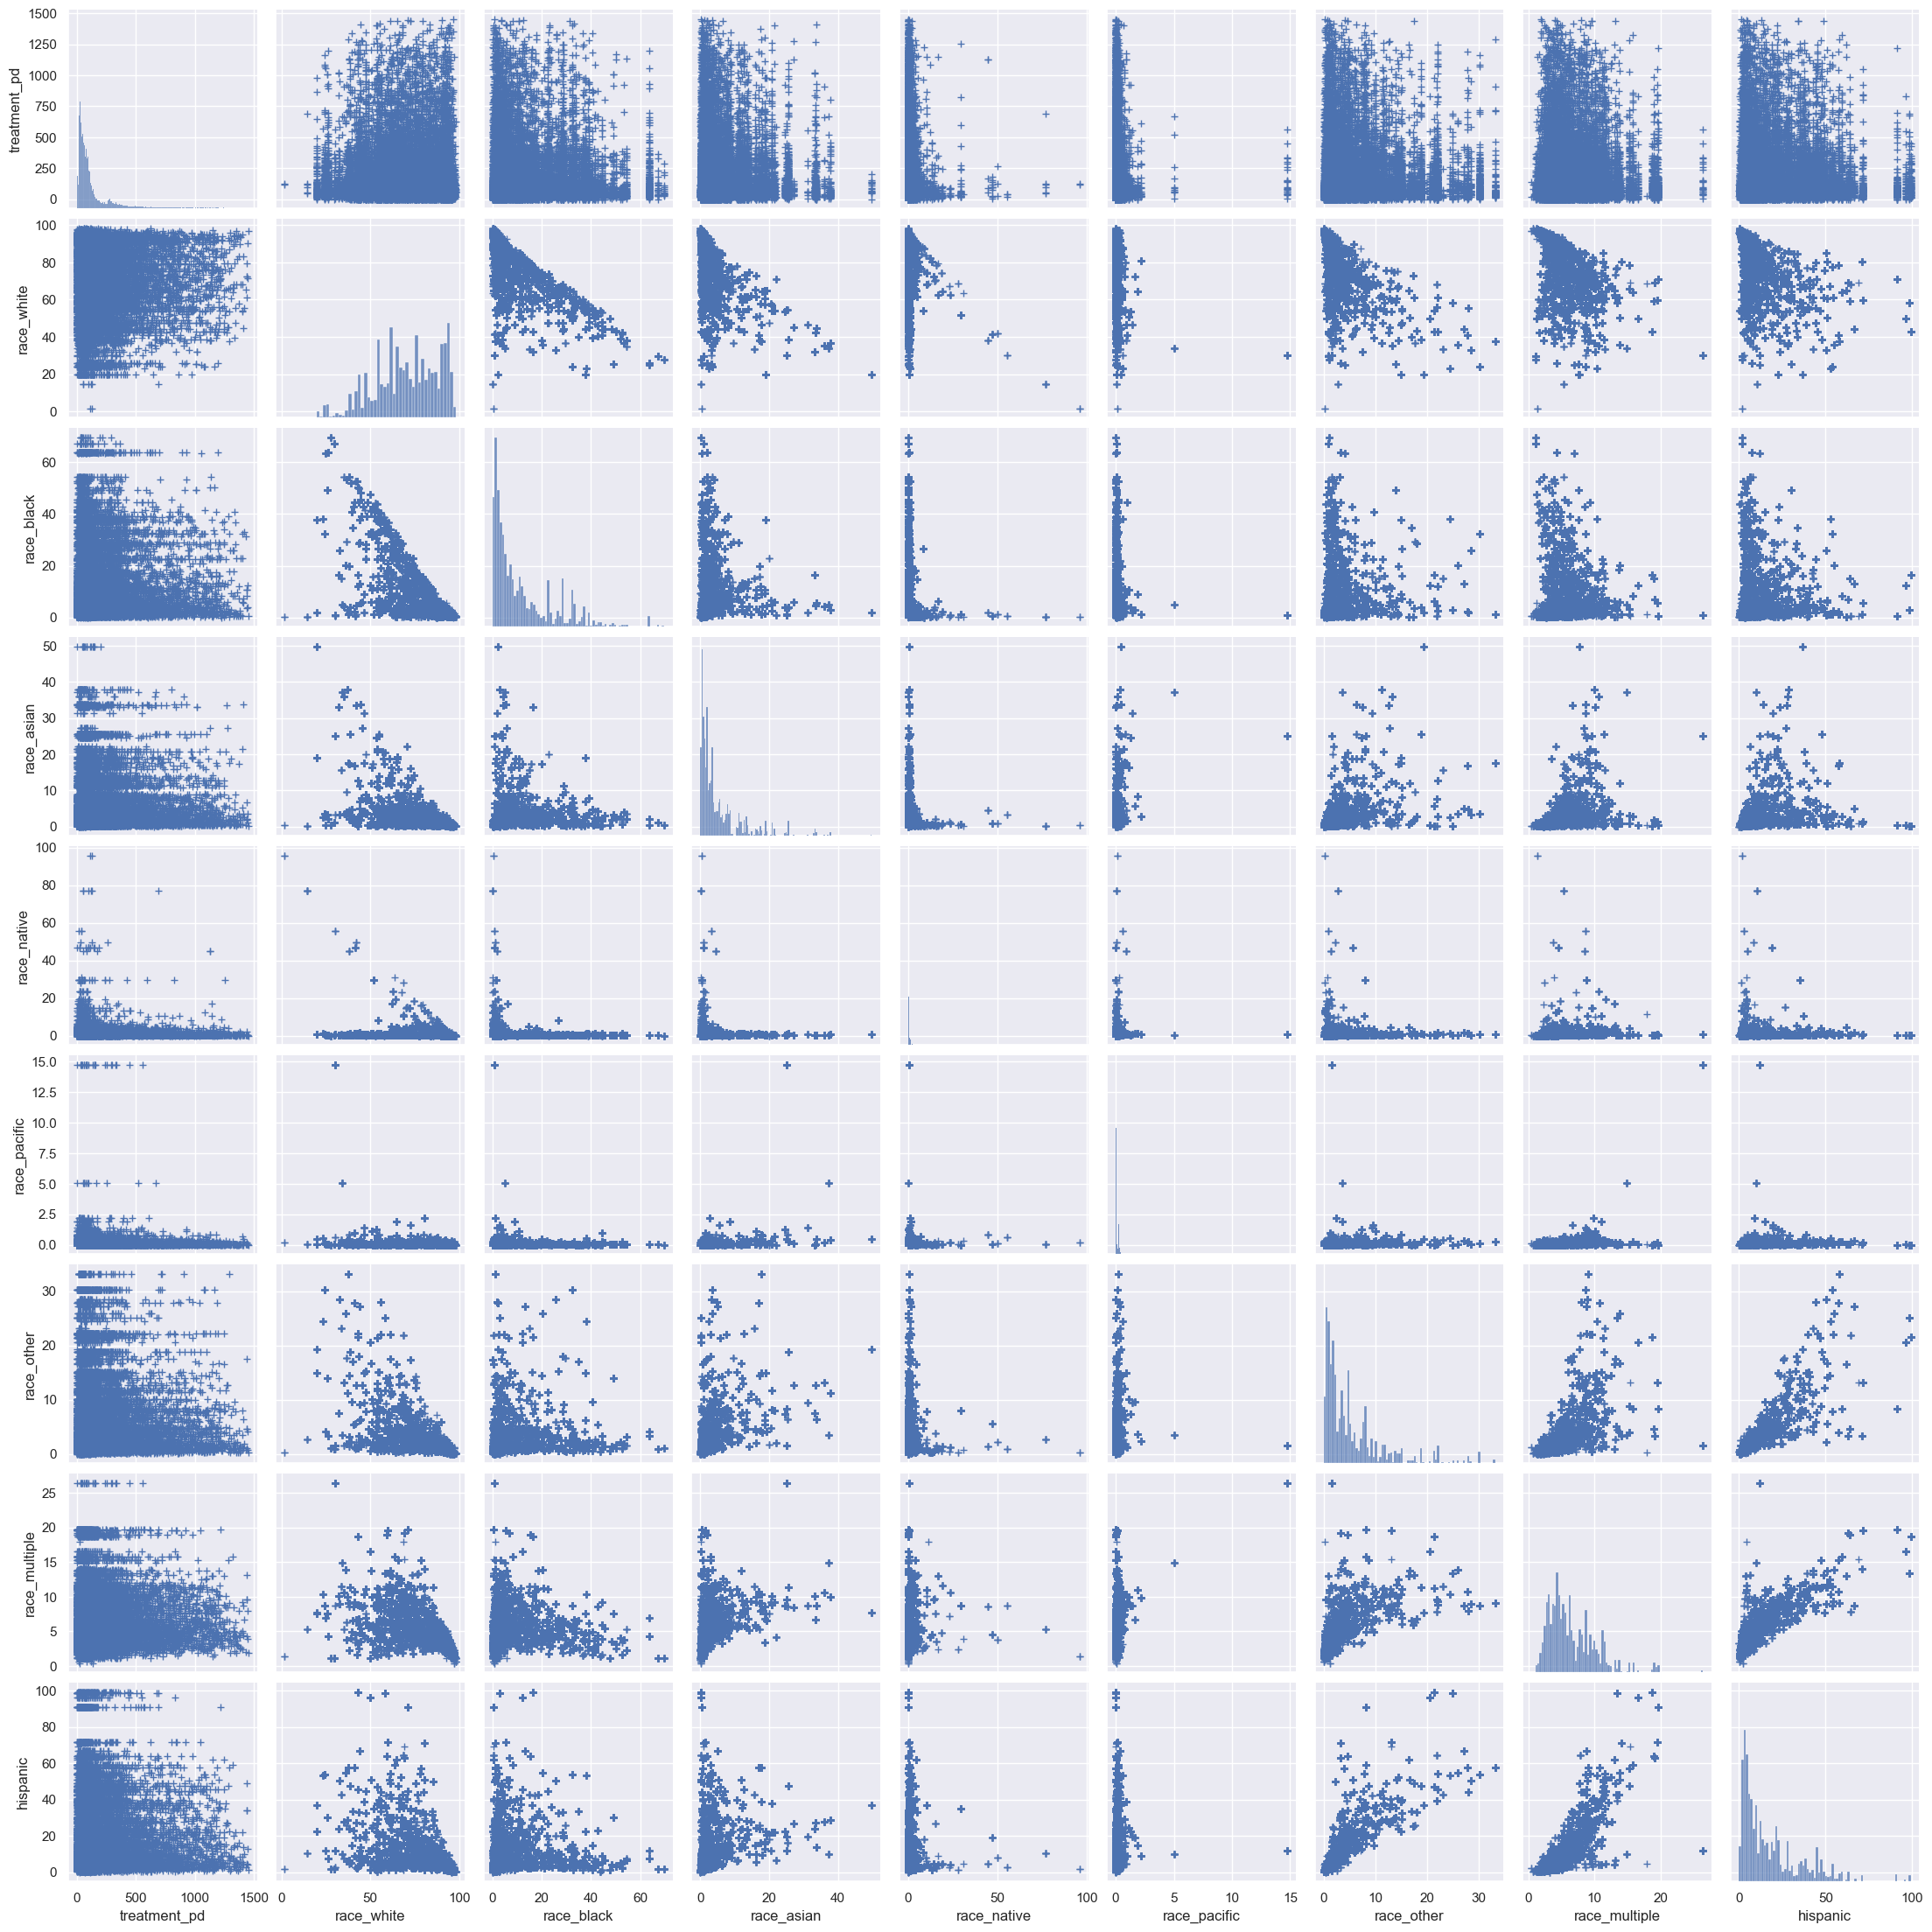

In [14]:
subset_data = train_data[['treatment_pd', 'race_white', 'race_black', 'race_asian', 
        'race_native', 'race_pacific', 'race_other', 'race_multiple', 'hispanic']]

plot_pairplot(subset_data)

# <font color=red>__Missing values__</font>

In [15]:
#Copying data sets
train_df=train_data.copy()

In [16]:
train_df = exclude_variables_with_high_missing_percentage(train_data, train_missing_percentages, threshold=60)
train_df=train_df.drop(['metastatic_first_treatment_type'], axis=1)

In [17]:
df=train_df.copy()

In [18]:
fill_missing_race(df)

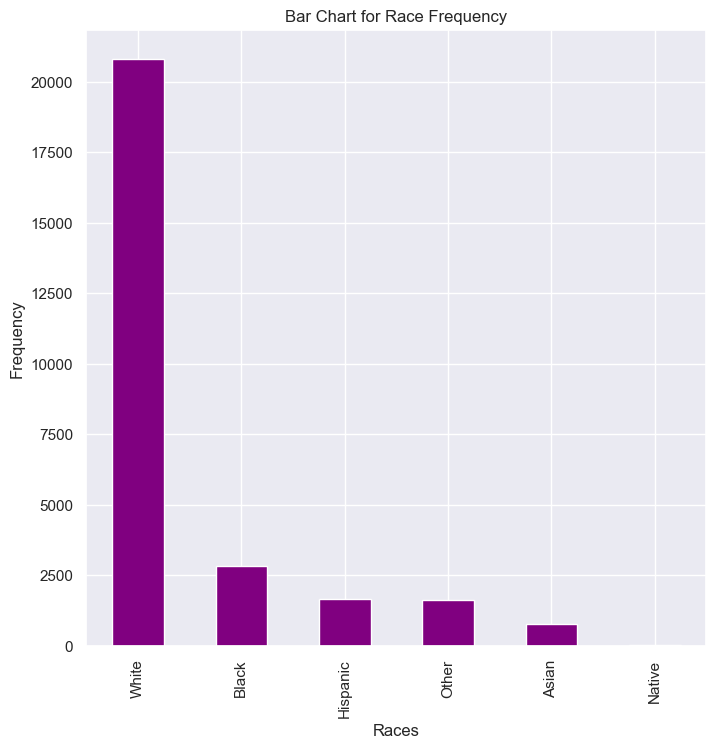

In [19]:
plot_frequency(df)

In [20]:
merge_infrequent_categories(df, 'patient_race', 0.02, 'Other')

,patient_id,patient_race,payer_type,patient_state,patient_zip3,patient_age,patient_gender,breast_cancer_diagnosis_code,breast_cancer_diagnosis_desc,breast_cancer_diagnosis_year,metastatic_cancer_diagnosis_code,metastatic_first_treatment,region,division,population,density,age_median,age_under_10,age_10_to_19,age_20s,age_30s,age_40s,age_50s,age_60s,age_70s,age_over_80,male,female,married,divorced,never_married,widowed,family_size,family_dual_income,income_household_median,income_household_under_5,income_household_5_to_10,income_household_10_to_15,income_household_15_to_20,income_household_20_to_25,income_household_25_to_35,income_household_35_to_50,income_household_50_to_75,income_household_75_to_100,income_household_100_to_150,income_household_150_over,income_household_six_figure,income_individual_median,home_ownership,housing_units,home_value,rent_median,rent_burden,education_less_highschool,education_highschool,education_some_college,education_bachelors,education_graduate,education_college_or_above,education_stem_degree,labor_force_participation,unemployment_rate,self_employed,farmer,race_white,race_black,race_asian,race_native,race_pacific,race_other,race_multiple,hispanic,disabled,poverty,limited_english,commute_time,health_uninsured,veteran,treatment_pd
0,994155,Asian,COMMERCIAL,CA,917,46,F,C50811,Malignant neoplasm of ovrlp sites of right fem...,2018,C779,DOXORUBICIN HCL,West,Pacific,43031,2048.578,38.852,11.307,12.898,14.122,13.533,13.161,13.378,11.474,6.380,3.737,49.052,50.948,48.504,10.117,36.409,4.970,3.675,59.220,86330.391,2.226,1.528,2.898,2.748,3.174,6.648,9.617,15.965,13.589,19.752,21.848,41.600,34317.826,61.398,12609.261,572606.500,1778.000,34.596,17.491,22.657,29.263,20.200,10.404,30.604,46.209,63.154,6.198,15.709,0.015,38.709,3.963,25.565,1.193,0.270,18.859,11.426,47.726,9.896,10.515,12.746,32.530,7.263,3.811,35
1,154389,White,MEDICARE ADVANTAGE,OH,451,63,F,C50412,Malig neoplasm of upper-outer quadrant of left...,2018,C7951,DOXORUBICIN HCL,Midwest,East North Central,7228,194.656,41.248,12.855,12.789,11.262,10.489,11.860,15.279,13.360,6.434,5.664,52.091,47.909,50.672,14.102,27.117,8.113,3.120,51.228,65214.721,2.330,3.249,4.468,5.879,5.323,7.840,12.247,20.040,14.051,15.677,8.902,24.579,32142.227,72.391,2789.958,155901.769,828.000,26.514,15.830,38.968,27.683,11.626,5.887,17.513,38.309,61.272,5.793,11.203,3.715,96.055,1.006,0.321,0.117,0.002,0.255,2.234,1.183,18.317,13.547,0.147,31.891,7.632,9.632,33
2,387343,White,COMMERCIAL,TX,773,53,F,C50212,Malig neoplasm of upper-inner quadrant of left...,2018,C773,PACLITAXEL,South,West South Central,24751,352.227,41.371,11.930,12.987,10.996,11.162,13.108,13.023,13.066,9.577,4.158,49.355,50.645,52.994,13.342,25.094,8.579,3.206,47.794,77147.408,3.198,2.358,3.423,3.825,3.974,8.425,12.402,16.906,12.472,15.155,17.849,33.004,37016.740,74.060,8450.339,213648.022,1207.696,28.148,13.257,29.300,31.066,17.632,8.743,26.375,45.467,57.926,5.423,13.245,2.300,76.874,8.906,2.268,0.381,0.060,3.589,7.915,21.064,14.083,11.943,2.549,32.556,16.396,10.392,24
3,921275,Hispanic,MEDICAID,CA,928,50,F,1749,"Malignant neoplasm of breast (female), unspeci...",2015,C787,GEMCITABINE HCL,West,Pacific,39122,2295.939,38.200,11.879,13.355,14.230,13.418,13.333,14.061,10.248,5.952,3.503,49.894,50.106,50.245,9.827,35.291,4.652,3.623,61.736,102741.636,2.327,1.536,2.648,2.179,2.409,5.164,7.973,13.936,12.470,19.761,29.597,49.358,41287.273,61.464,11725.667,677688.515,2003.125,34.753,14.230,19.988,29.797,23.739,12.245,35.985,47.918,65.230,5.103,15.224,0.027,54.030,2.527,20.827,0.588,0.300,11.645,10.082,37.948,8.958,10.109,8.058,30.606,7.018,4.103,455
4,803454,White,COMMERCIAL,NY,112,39,F,1749,"Malignant neoplasm of breast (female), unspeci...",2015,C7989,DOXORUBICIN HCL,Northeast,Middle Atlantic,71374,17326.408,36.476,12.987,11.318,14.971,17.255,12.632,11.461,9.789,6.000,3.582,47.668,52.332,39.924,10.239,44.642,5.187,3.412,53.447,74499.711,4.334,3.305,5.863,4.461,4.042,7.589,9.897,13.542,10.742,14.889,21.318,36.208,394

In [21]:
df = check_and_fill_all_missing_values(df, 'patient_zip3', 'population', ['payer_type'])

In [22]:
df = impute_by_cv(df, df, 'patient_state', cv_threshold=30, exclude_columns=['payer_type'])

In [23]:
df = replace_missing_with_logistic_regression(df, 'payer_type')

In [24]:
csv_file_path = 'data_train.csv'

# Saving train data set into csv file
df.to_csv(csv_file_path, index=False)

## <font color=purple>__TEST DATA_SET__</font>

In [25]:
test_df=test_data.copy()

In [26]:
test_df = exclude_variables_with_high_missing_percentage(test_df, test_missing_percentages, threshold=60)
test_df=test_df.drop(['metastatic_first_treatment_type'], axis=1)

In [27]:
tdf=test_df.copy()

In [28]:
fill_missing_race(tdf)

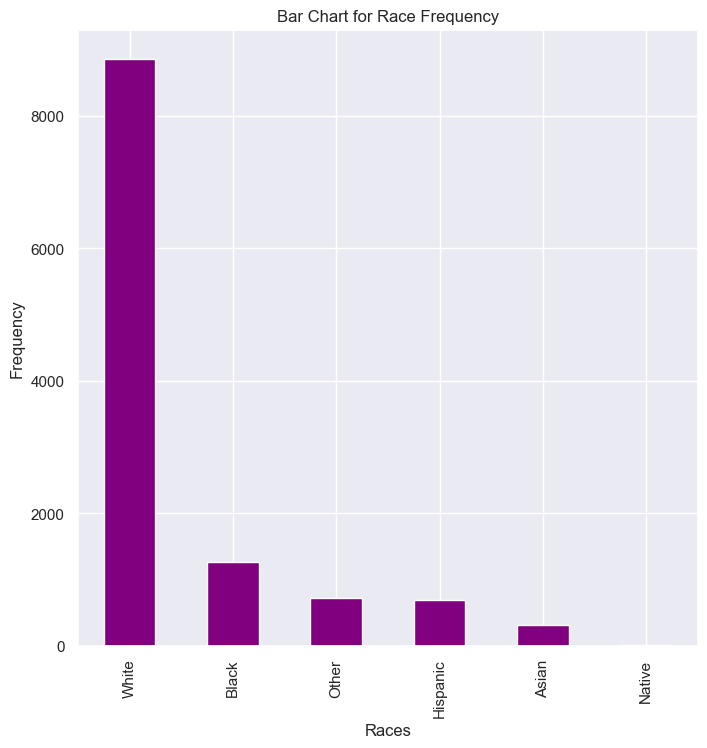

In [29]:
plot_frequency(tdf)

In [30]:
merge_infrequent_categories(tdf, 'patient_race', 0.02, 'Other')

,patient_id,patient_race,payer_type,patient_state,patient_zip3,patient_age,patient_gender,breast_cancer_diagnosis_code,breast_cancer_diagnosis_desc,breast_cancer_diagnosis_year,metastatic_cancer_diagnosis_code,metastatic_first_treatment,region,division,population,density,age_median,age_under_10,age_10_to_19,age_20s,age_30s,age_40s,age_50s,age_60s,age_70s,age_over_80,male,female,married,divorced,never_married,widowed,family_size,family_dual_income,income_household_median,income_household_under_5,income_household_5_to_10,income_household_10_to_15,income_household_15_to_20,income_household_20_to_25,income_household_25_to_35,income_household_35_to_50,income_household_50_to_75,income_household_75_to_100,income_household_100_to_150,income_household_150_over,income_household_six_figure,income_individual_median,home_ownership,housing_units,home_value,rent_median,rent_burden,education_less_highschool,education_highschool,education_some_college,education_bachelors,education_graduate,education_college_or_above,education_stem_degree,labor_force_participation,unemployment_rate,self_employed,farmer,race_white,race_black,race_asian,race_native,race_pacific,race_other,race_multiple,hispanic,disabled,poverty,limited_english,commute_time,health_uninsured,veteran
0,704520,White,COMMERCIAL,IL,600,49,F,C50912,Malignant neoplasm of unspecified site of left...,2016,C7951,DOXORUBICIN HCL,Midwest,East North Central,25744,981.763,41.763,11.785,13.868,10.574,11.325,12.592,15.015,13.028,7.818,3.991,49.929,50.071,57.211,9.674,28.022,5.089,3.166,58.346,107517.734,2.297,1.298,2.020,2.254,2.640,7.212,8.557,13.965,11.845,18.415,29.495,47.911,49008.078,76.163,9478.415,366298.381,1467.651,30.721,7.297,21.635,24.594,27.111,19.351,46.462,43.748,65.912,5.064,13.766,0.163,76.872,3.791,8.482,0.345,0.043,4.834,5.635,15.717,9.208,7.011,4.478,30.387,5.934,6.791
1,849592,White,COMMERCIAL,OH,455,53,F,C50811,Malignant neoplasm of ovrlp sites of right fem...,2017,C773,DOXORUBICIN HCL,Midwest,East North Central,16722,346.450,40.080,12.060,14.580,11.940,10.940,11.900,13.040,13.080,7.720,4.760,47.920,52.080,44.360,14.880,32.880,7.860,2.972,45.800,53432.000,3.060,3.580,5.100,5.060,4.740,12.180,14.600,18.500,12.680,12.520,7.900,20.420,29270.800,65.600,6781.167,117910.400,754.800,29.760,11.500,37.780,32.220,11.140,7.380,18.520,40.960,59.600,7.440,8.920,0.880,81.260,12.080,0.640,0.060,0.040,0.680,5.240,3.660,16.300,15.980,0.560,21.520,6.880,9.260
2,493101,White,COMMERCIAL,VA,234,60,F,C50919,Malignant neoplasm of unsp site of unspecified...,2017,C7951,GEMCITABINE HCL,South,South Atlantic,13242,299.253,44.931,9.123,10.682,13.836,11.330,9.570,14.748,14.352,12.457,3.891,50.520,49.480,50.132,13.802,29.336,6.739,2.787,51.697,71312.206,2.893,1.771,5.266,5.690,3.227,8.573,12.302,20.132,12.959,13.661,13.520,27.180,34666.878,70.834,5129.067,265131.333,1117.714,30.780,13.550,30.255,28.159,15.857,12.189,28.045,40.085,61.398,5.010,9.500,0.490,66.314,26.077,1.993,0.200,0.027,1.061,4.323,7.766,12.951,13.185,0.871,25.067,8.607,17.900
3,775736,White,COMMERCIAL,CA,925,51,F,C50012,"Malignant neoplasm of nipple and areola, left ...",2018,C773,DOXORUBICIN HCL,West,Pacific,38343,700.337,36.279,13.267,15.664,13.495,13.454,12.400,11.585,10.467,6.377,3.285,49.990,50.010,48.808,11.897,34.349,4.949,3.798,52.892,78696.872,2.590,1.805,3.164,3.705,3.226,7.400,10.421,16.833,13.446,19.205,18.231,37.436,32818.538,66.818,10825.825,392600.447,1631.641,35.558,16.251,27.546,33.885,13.923,8.395,22.318,43.374,59.469,7.277,13.205,0.436,53.946,6.410,5.828,0.813,0.379,21.354,11.272,46.885,12.826,12.721,4.582,37.072,8.072,7.754
4,357414,White,COMMERCIAL,CA,910,47,F,1748,Malignant neoplasm of other specified sites of...,2015,C773,CARBOPLATIN,West,Pacific,22084,2681.615,46.792,9.000,11.462,9.423,11.092,12.777,15.077,12.108,12.769,6.300,48.962,51.038,55.669,9.715,29.423,5.231,3.228,52.231,109150.500,2.646,1.600,2.338,6.500,2.485,5.762,6.754,13.400,9.092,16.969,32.454,49.423,47321.077,59.069,7715.538,962341.167,1879.583,33.23

In [31]:
tdf = check_and_fill_all_missing_values(tdf, 'patient_zip3', 'population', ['payer_type'])

In [32]:
tdf = impute_by_cv(tdf, df, 'patient_state', cv_threshold=30, exclude_columns=['payer_type'])

In [33]:
tdf = replace_missing_with_logistic_regression(tdf, 'payer_type')

In [37]:
csv_file_path = 'data_test.csv'

# Saving train data set into csv file
tdf.to_csv(csv_file_path, index=False)

 # <font color=red>__Predictions__</font>

In [38]:
#train_data = pd.read_csv('data_train.csv')
#test_data = pd.read_csv('data_test.csv')
train_data=df.copy()
test_data=tdf.copy()
print(train_data.shape)
print(test_data.shape)

(27674, 79)
(11845, 78)


In [44]:
X = train_data.drop([ 'patient_id', 'patient_gender'], axis=1)
y = train_data['treatment_pd']

In [45]:
%%time
from autogluon.tabular import TabularDataset, TabularPredictor

time_limit = 3600*10

automl = TabularPredictor(label='treatment_pd', problem_type='regression',eval_metric='root_mean_squared_error')
                          
automl.fit(X, presets='medium_quality', time_limit=time_limit, num_bag_folds=5, num_bag_sets=0, num_stack_levels=0, dynamic_stacking=False, 
            included_model_types=['XGB', 'CAT', 'GBM'], ag_args_fit={'num_cpus': 4},
          )

No path specified. Models will be saved in: "AutogluonModels\ag-20240625_125120"
Presets specified: ['medium_quality']
Beginning AutoGluon training ... Time limit = 36000s
AutoGluon will save models to "AutogluonModels\ag-20240625_125120"
=================== System Info ===================
AutoGluon Version:  1.1.0b20240411
Python Version:     3.11.5
Operating System:   Windows
Platform Machine:   AMD64
Platform Version:   10.0.19045
CPU Count:          4
Memory Avail:       3.14 GB / 11.26 GB (27.9%)
Disk Space Avail:   35.30 GB / 237.93 GB (14.8%)
Train Data Rows:    27674
Train Data Columns: 76
Label Column:       treatment_pd
Problem Type:       regression
Preprocessing data ...
Using Feature Generators to preprocess the data ...
Fitting AutoMLPipelineFeatureGenerator...
	Available Memory:                    3249.88 MB
	Train Data (Original)  Memory Usage: 30.83 MB (0.9% of available memory)
	Inferring data type of each feature based on column values. Set feature_metadata_in to man

CPU times: total: 3min 41s
Wall time: 1min 9s


In [46]:
automl.leaderboard()

,model,score_val,eval_metric,pred_time_val,fit_time,pred_time_val_marginal,fit_time_marginal,stack_level,can_infer,fit_order
0,WeightedEnsemble_L2,-143.104,root_mean_squared_error,0.430,28.691,0.001,0.078,2,True,4
1,LightGBMXT_BAG_L1,-143.496,root_mean_squared_error,0.250,14.745,0.250,14.745,1,True,1
2,LightGBM_BAG_L1,-143.626,root_mean_squared_error,0.179,13.867,0.179,13.867,1,True,2
3,LightGBMLarge_BAG_L1,-146.371,root_mean_squared_error,0.239,35.747,0.239,35.747,1,True,3


In [47]:
predictions = automl.predict(test_data)

In [48]:
feature_importance = automl.feature_importance(train_data)
print(feature_importance)

These features in provided data are not utilized by the predictor and will be ignored: ['patient_id', 'patient_gender', 'breast_cancer_diagnosis_desc']
Computing feature importance via permutation shuffling for 75 features using 5000 rows with 5 shuffle sets...


	206.56s	= Expected runtime (41.31s per shuffle set)
	94.04s	= Actual runtime (Completed 5 of 5 shuffle sets)


                                  importance  stddev  p_value  n  p99_high  p99_low
metastatic_first_treatment            40.919   1.574    0.000  5    44.160   37.678
breast_cancer_diagnosis_code          22.917   2.130    0.000  5    27.303   18.531
breast_cancer_diagnosis_year          11.971   1.023    0.000  5    14.077    9.865
metastatic_cancer_diagnosis_code       5.535   0.647    0.000  5     6.867    4.203
patient_state                          3.091   0.292    0.000  5     3.692    2.490
patient_age                            1.196   0.153    0.000  5     1.511    0.880
payer_type                             0.688   0.083    0.000  5     0.860    0.516
rent_burden                            0.398   0.102    0.000  5     0.609    0.188
age_40s                                0.376   0.115    0.001  5     0.612    0.139
race_native                            0.347   0.117    0.001  5     0.587    0.107
income_household_75_to_100             0.343   0.047    0.000  5     0.440  

Categorical features with importance greater than 0.3:
 ['metastatic_first_treatment', 'breast_cancer_diagnosis_code', 'metastatic_cancer_diagnosis_code', 'patient_state', 'payer_type']


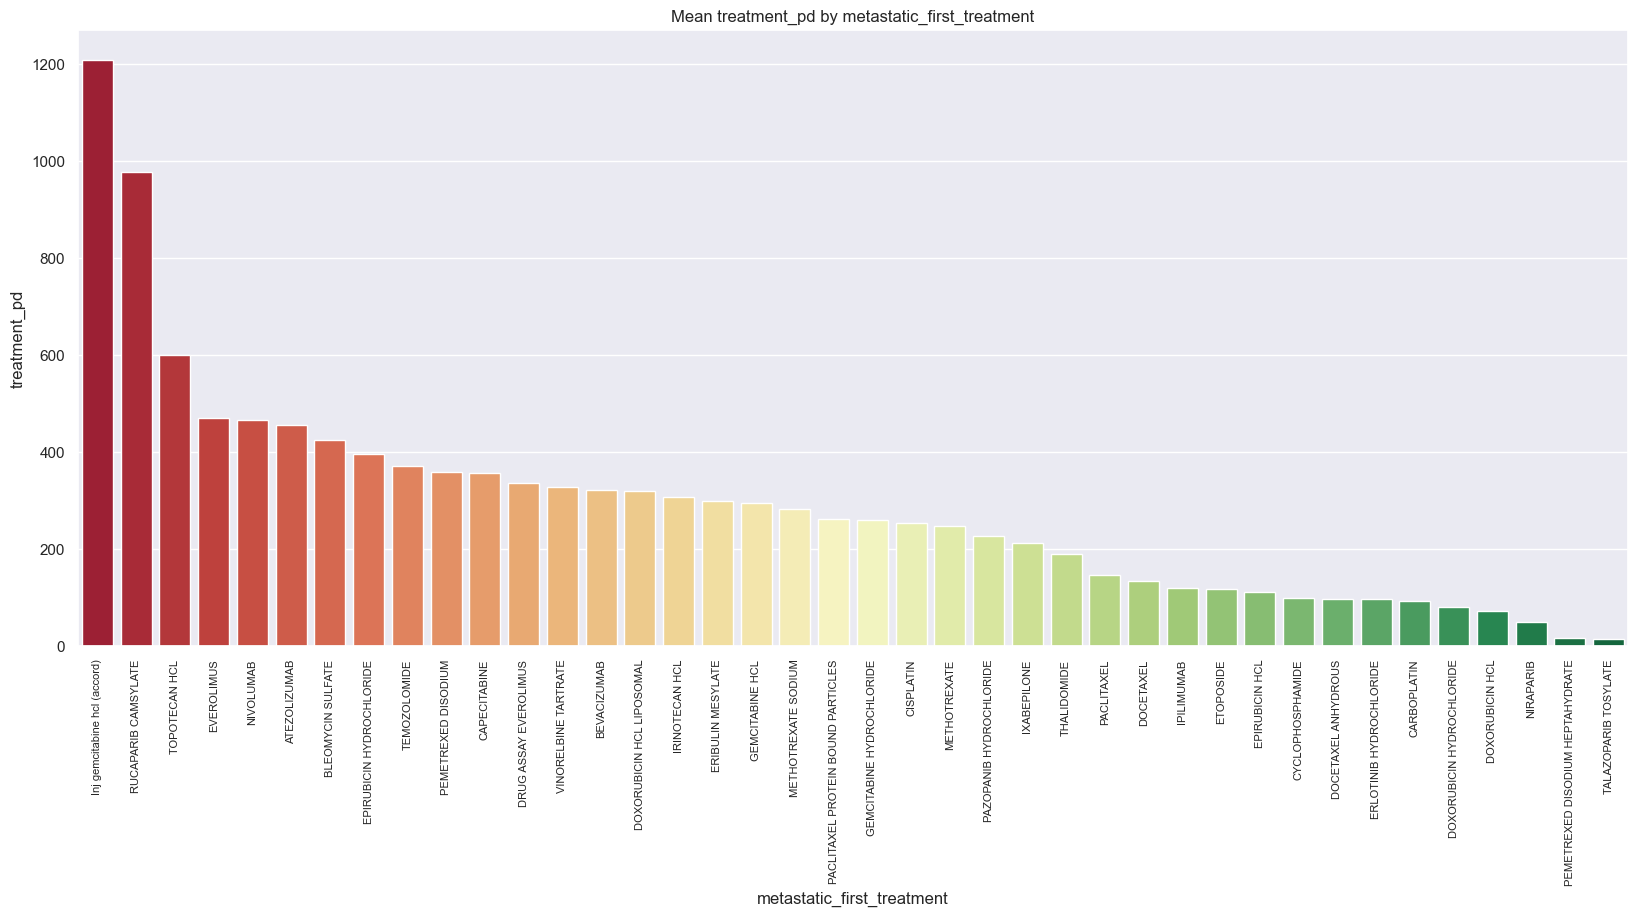

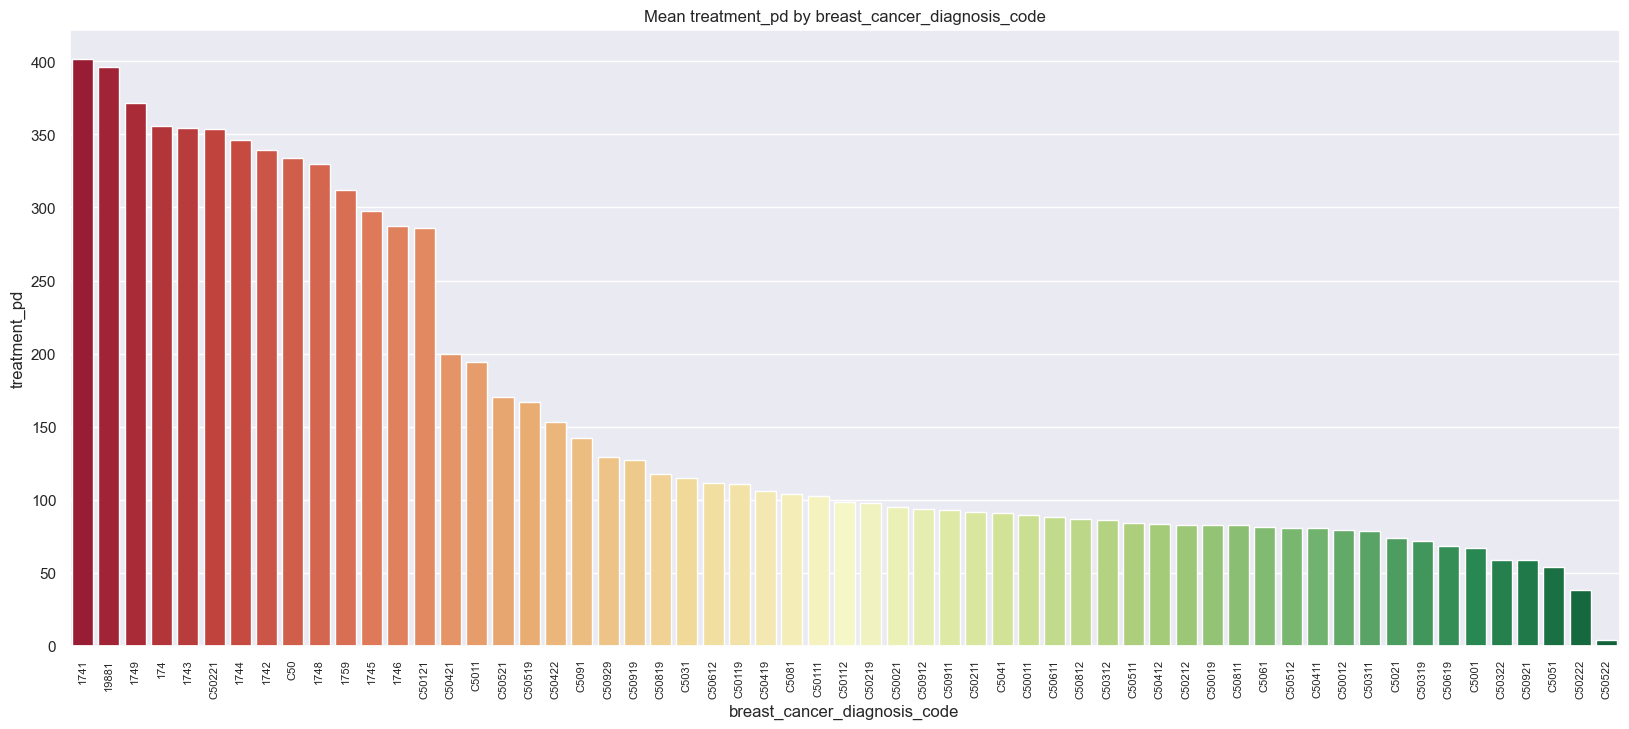

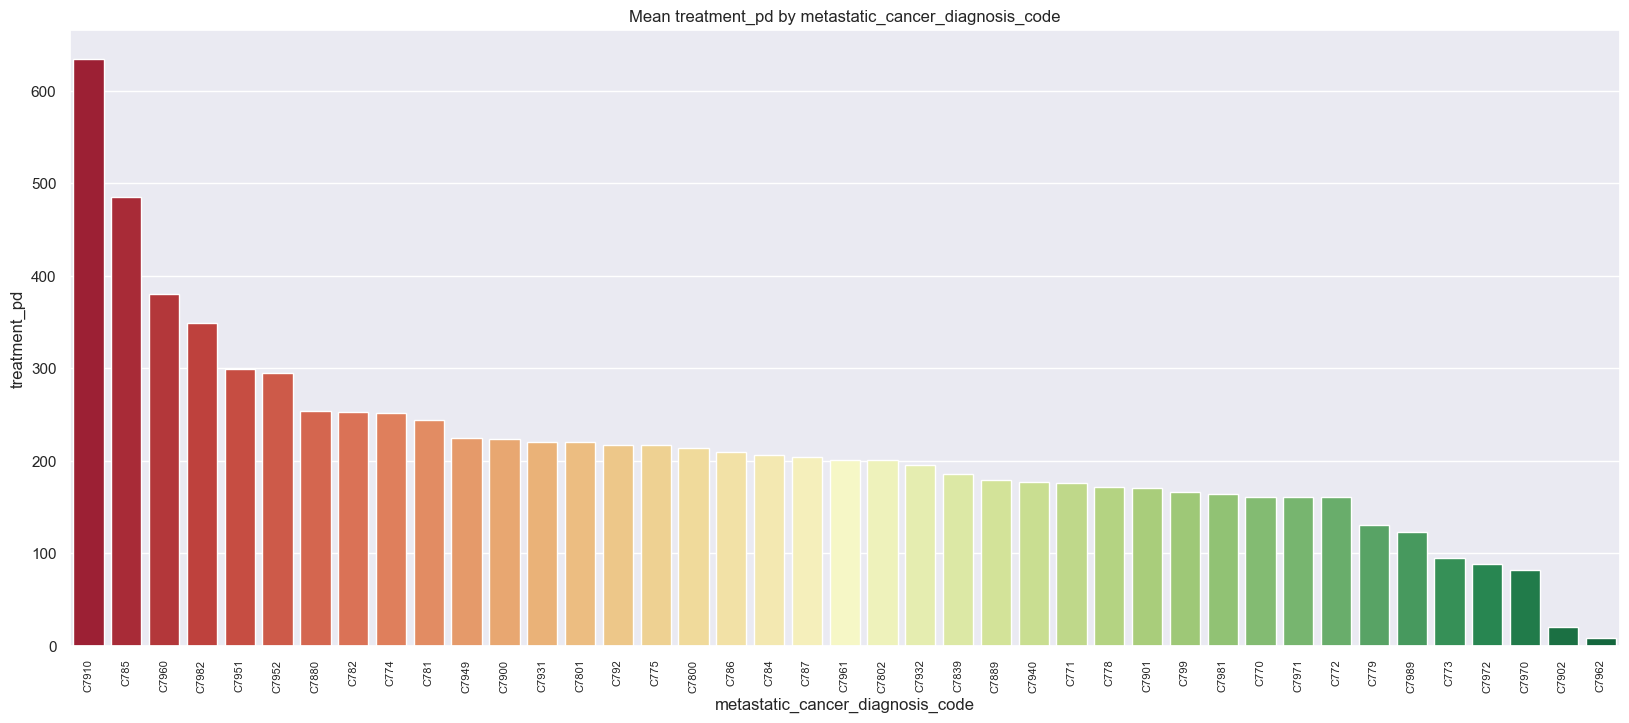

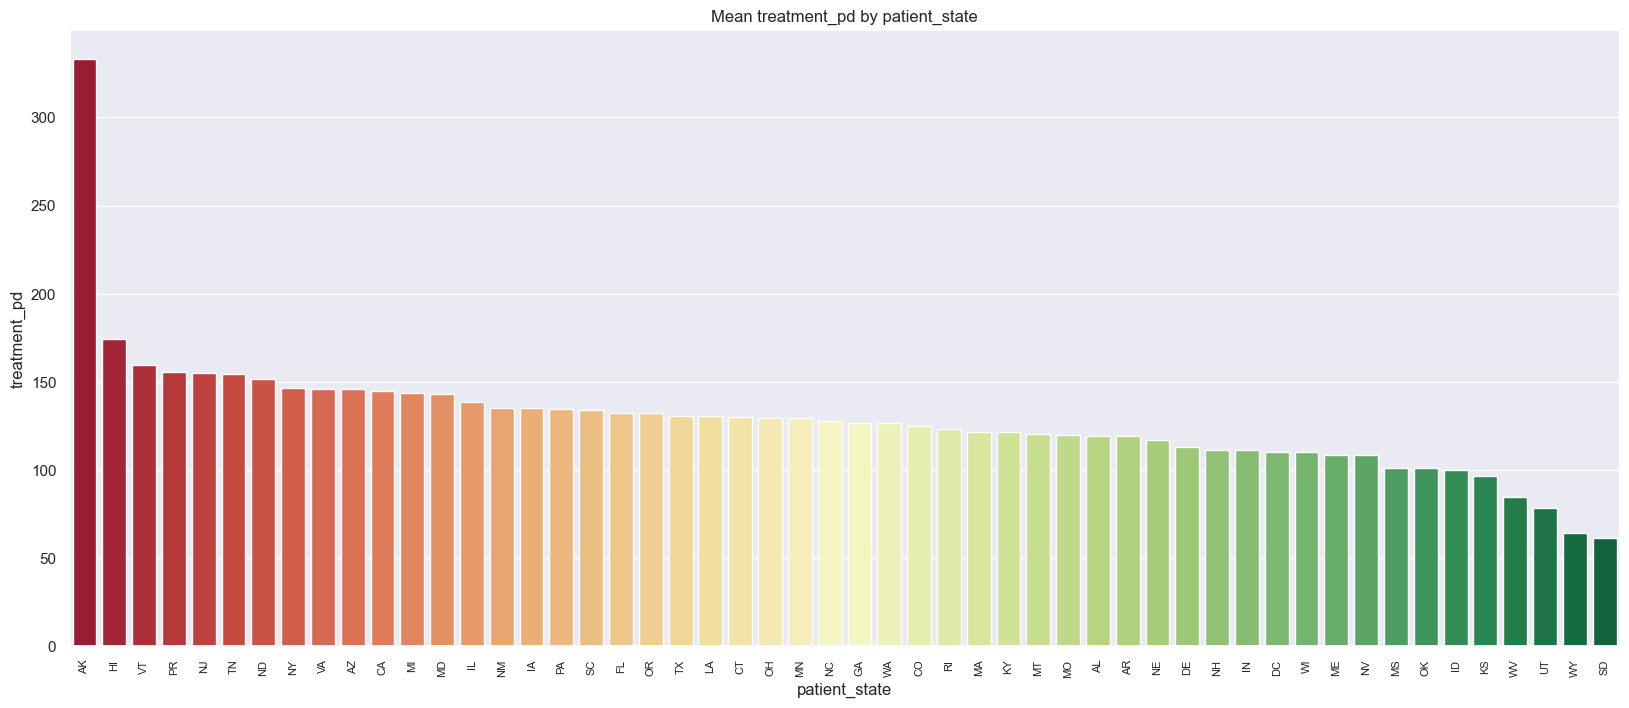

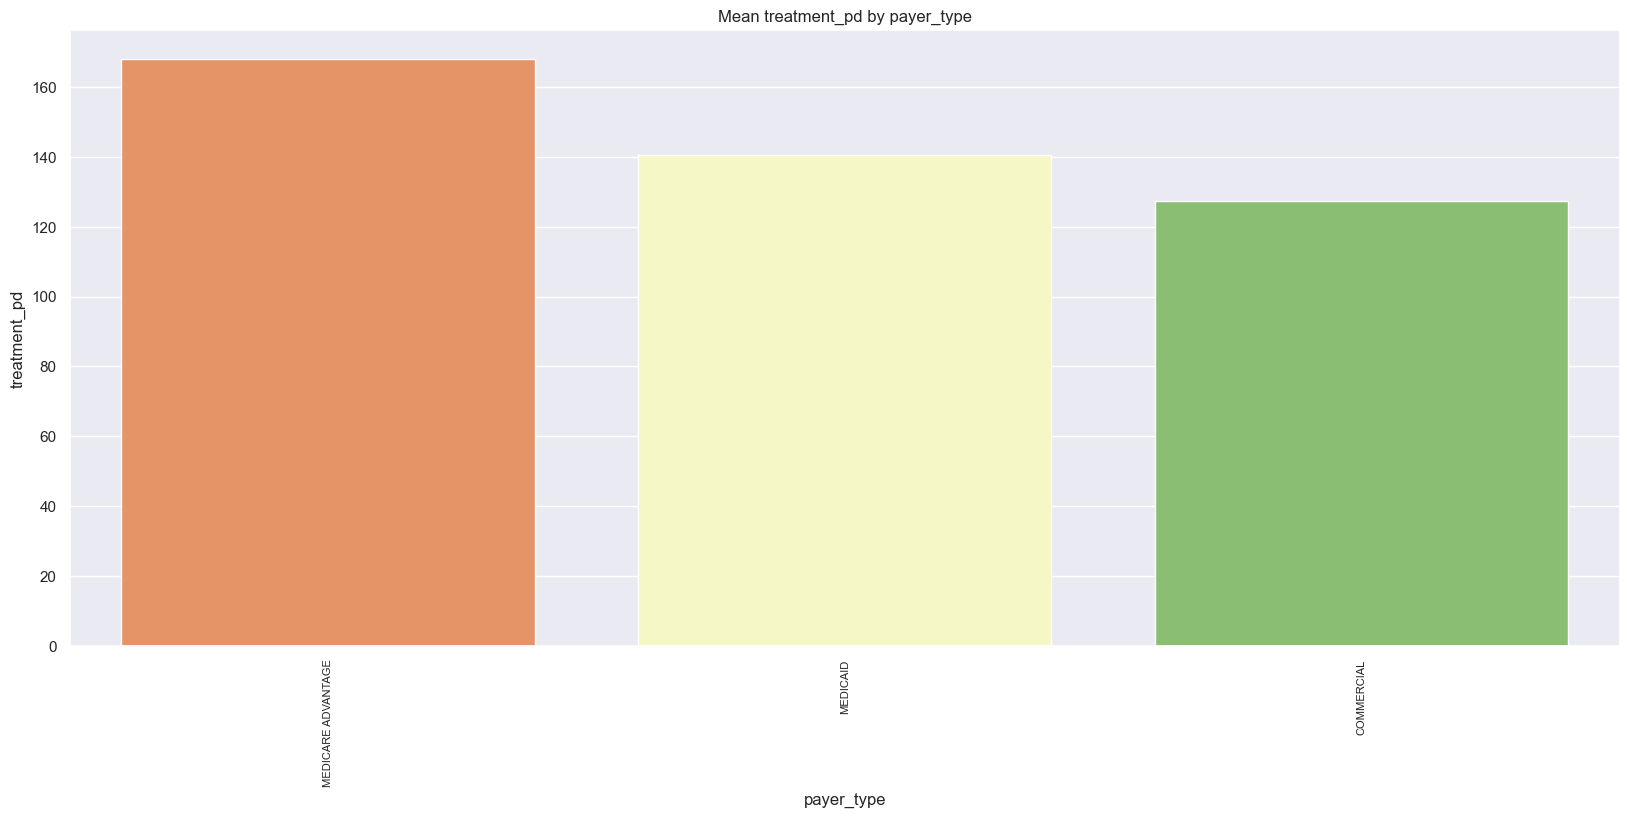

In [49]:
plot_categorical_features(train_data, 'treatment_pd', feature_importance, threshold=0.3)

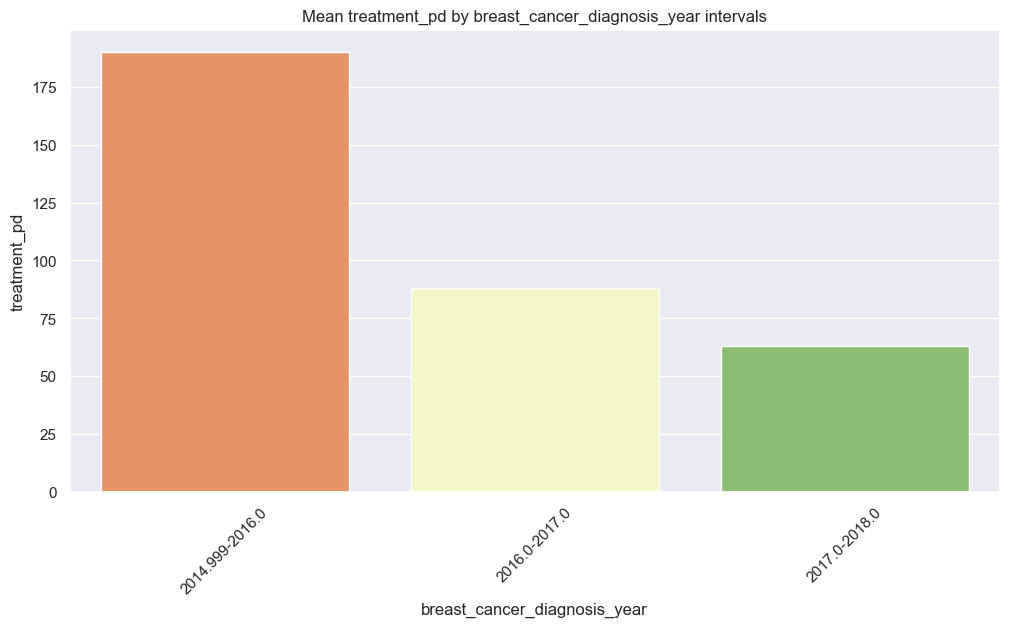

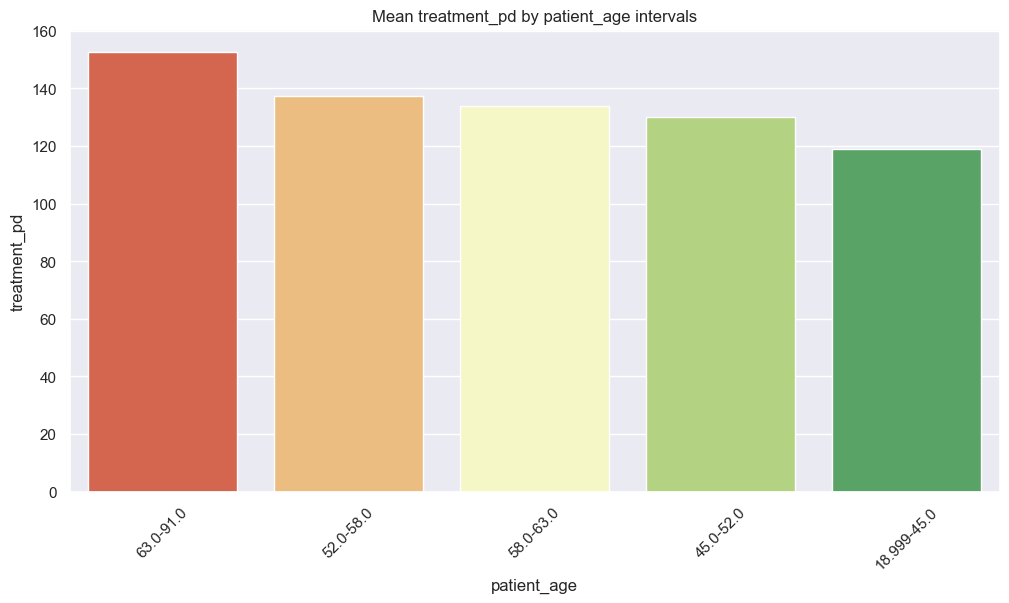

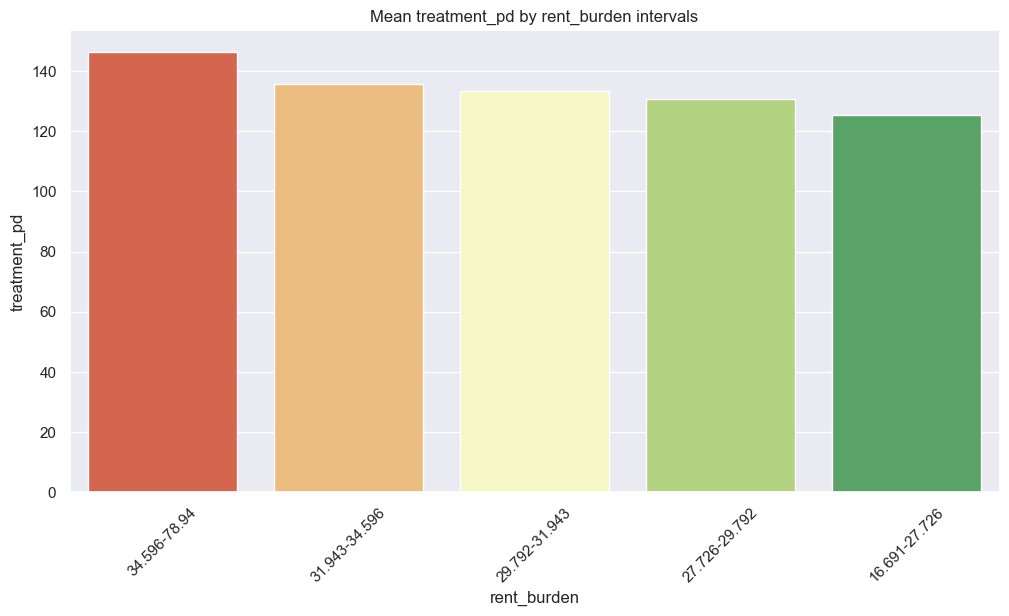

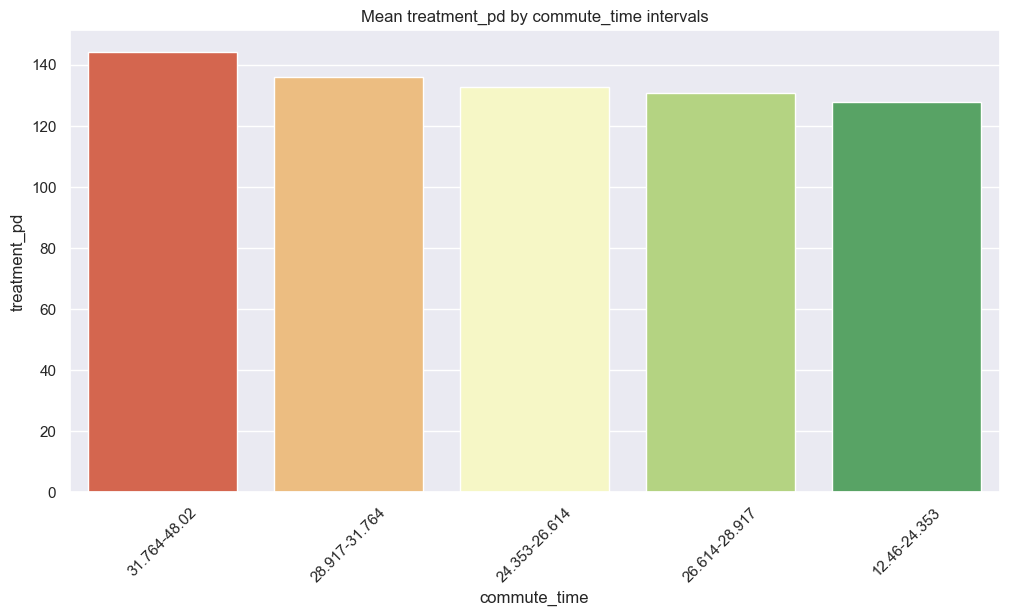

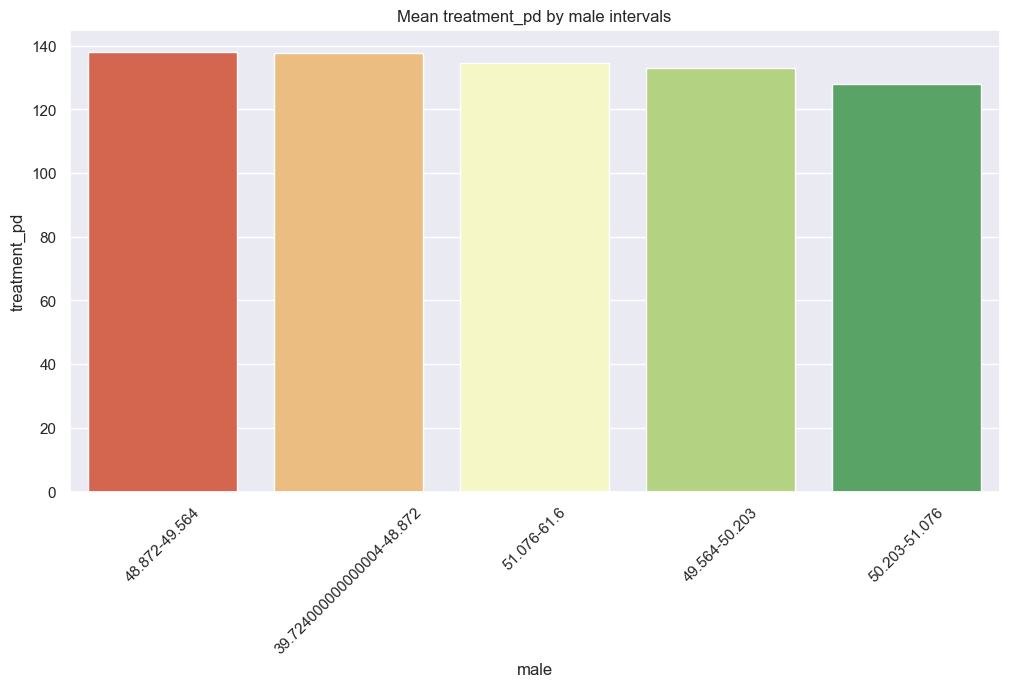

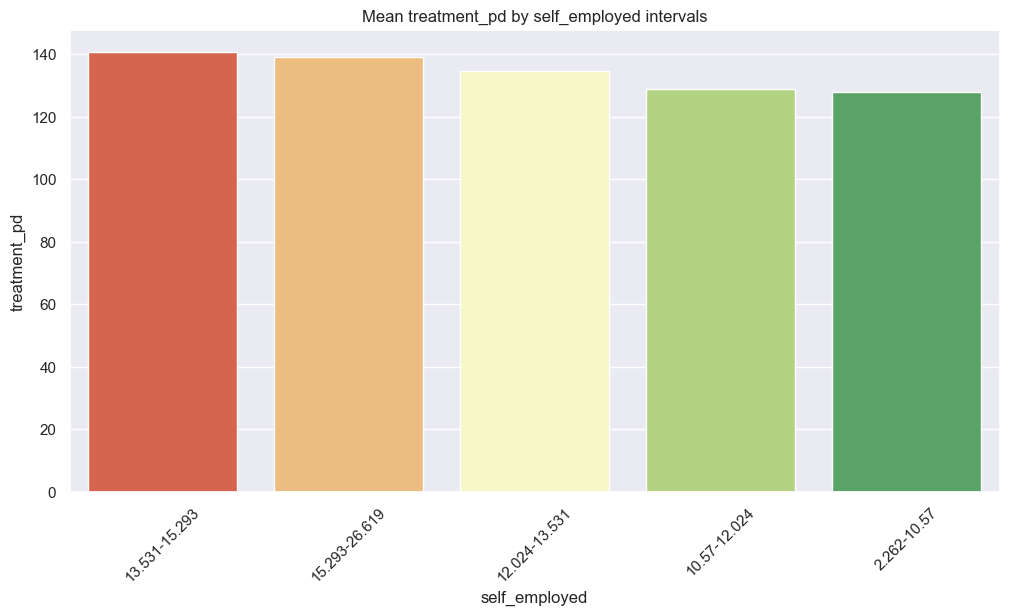

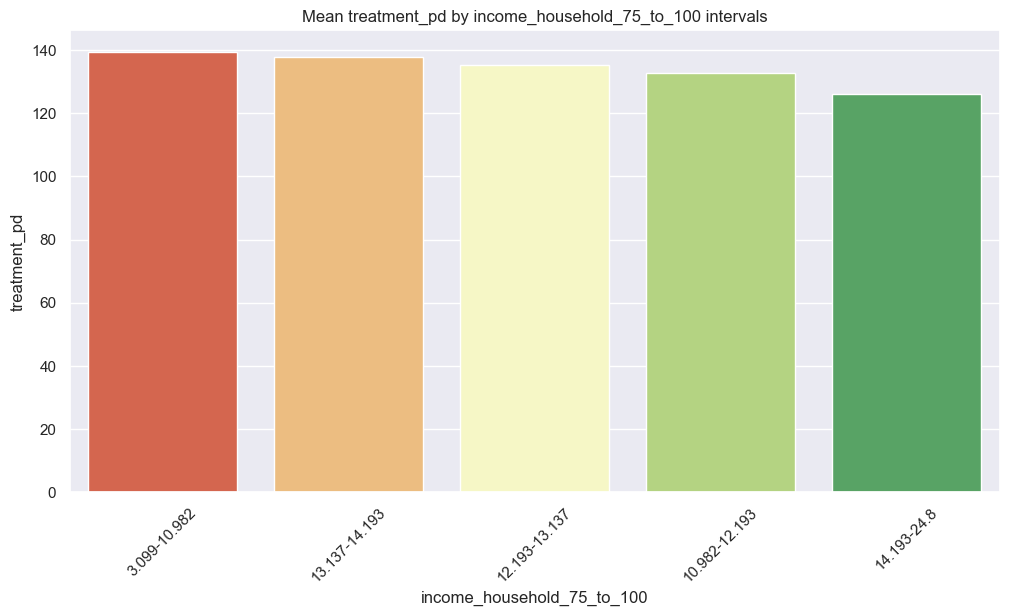

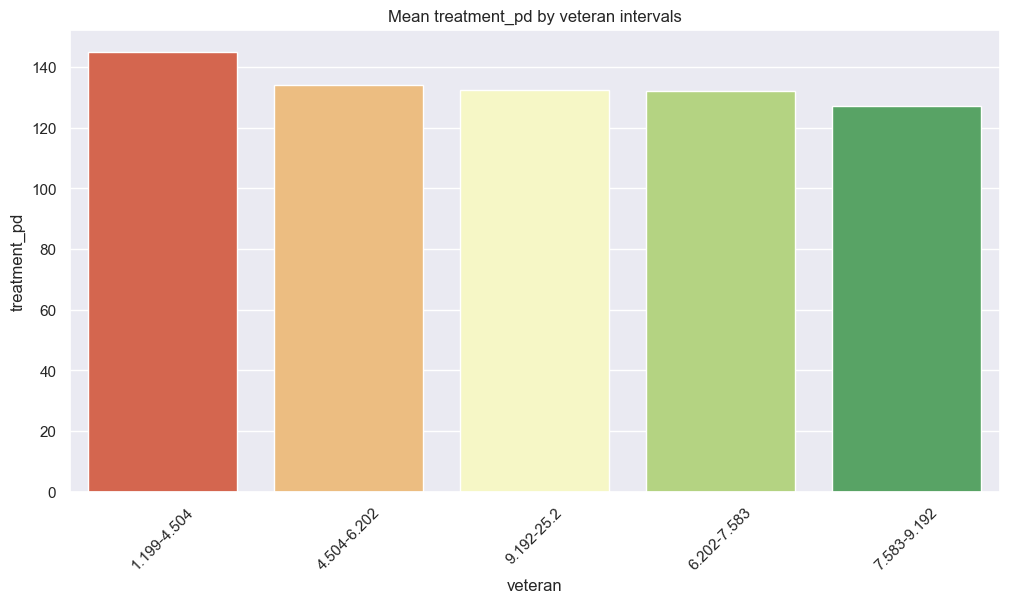

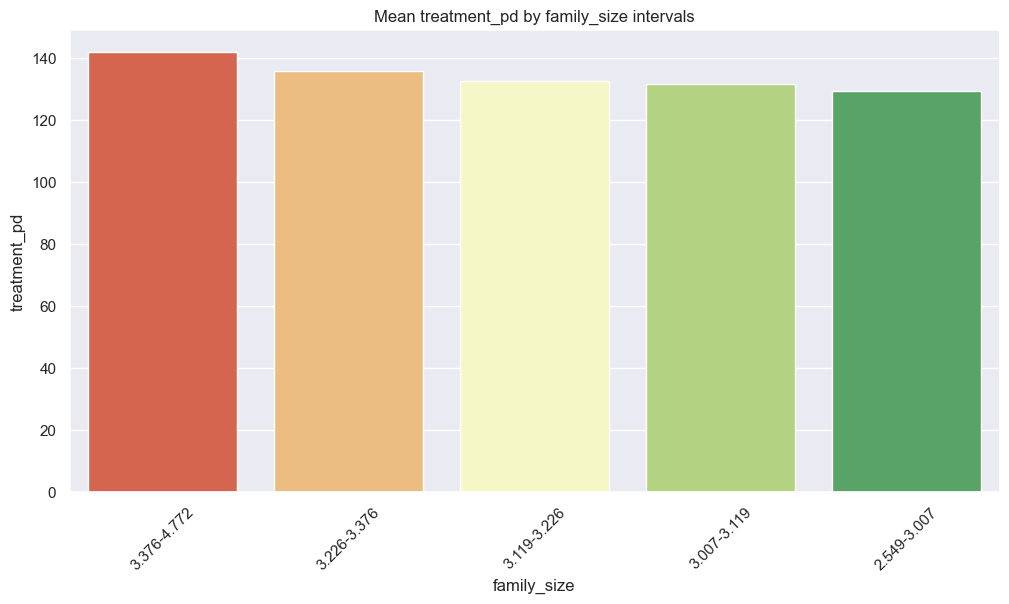

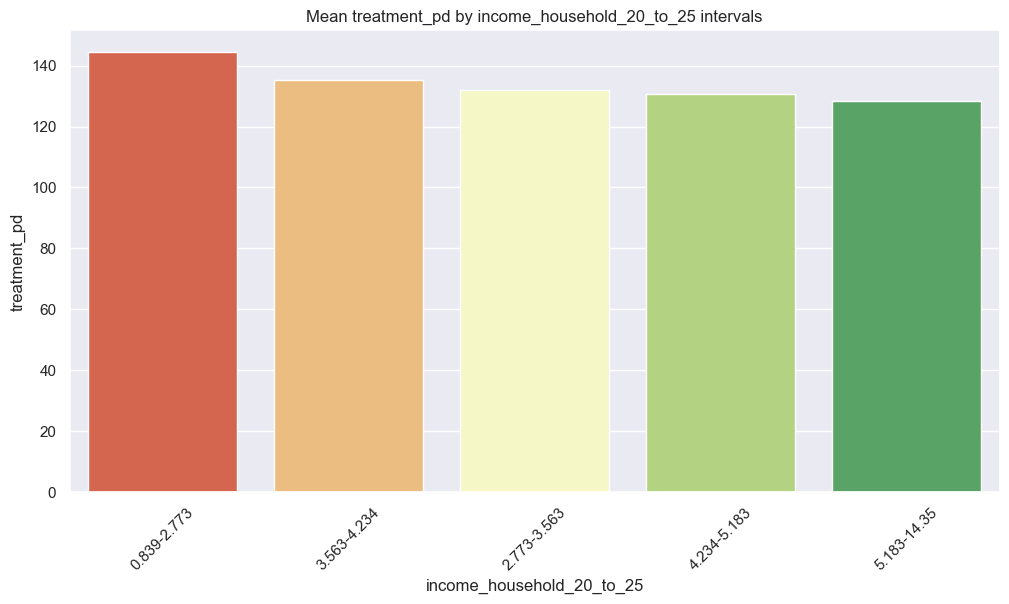

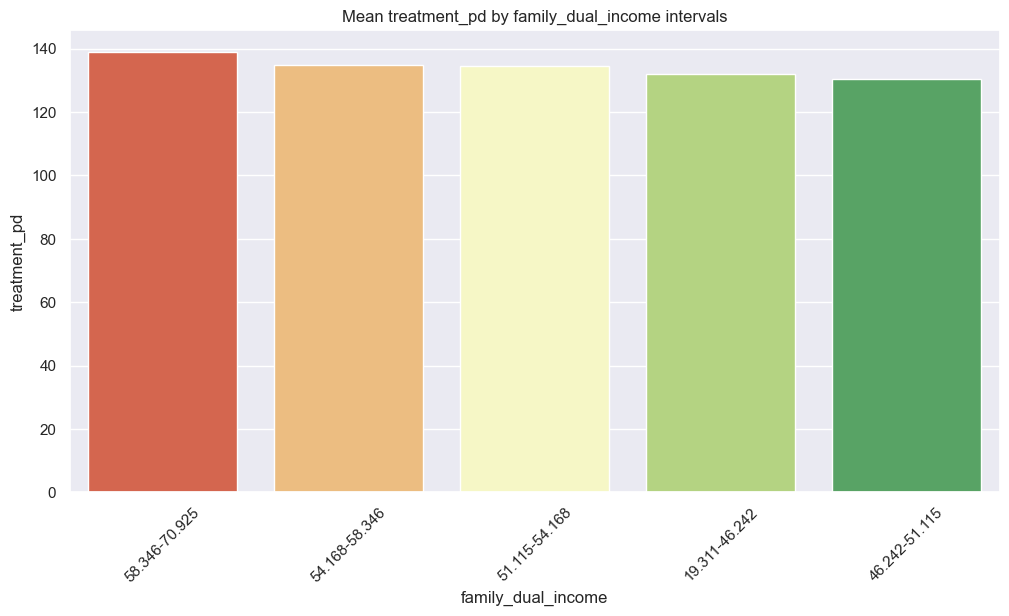

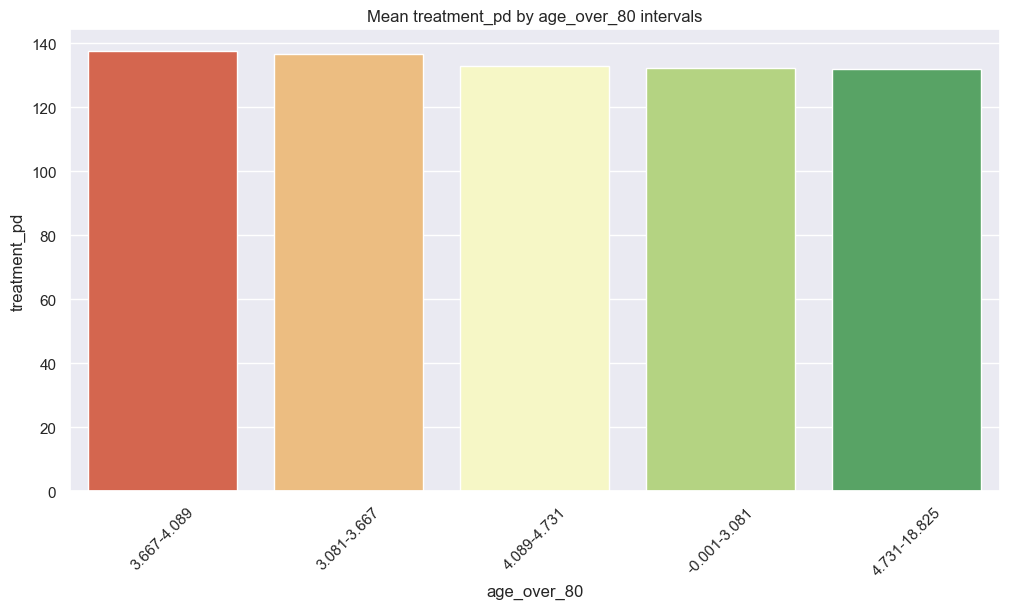

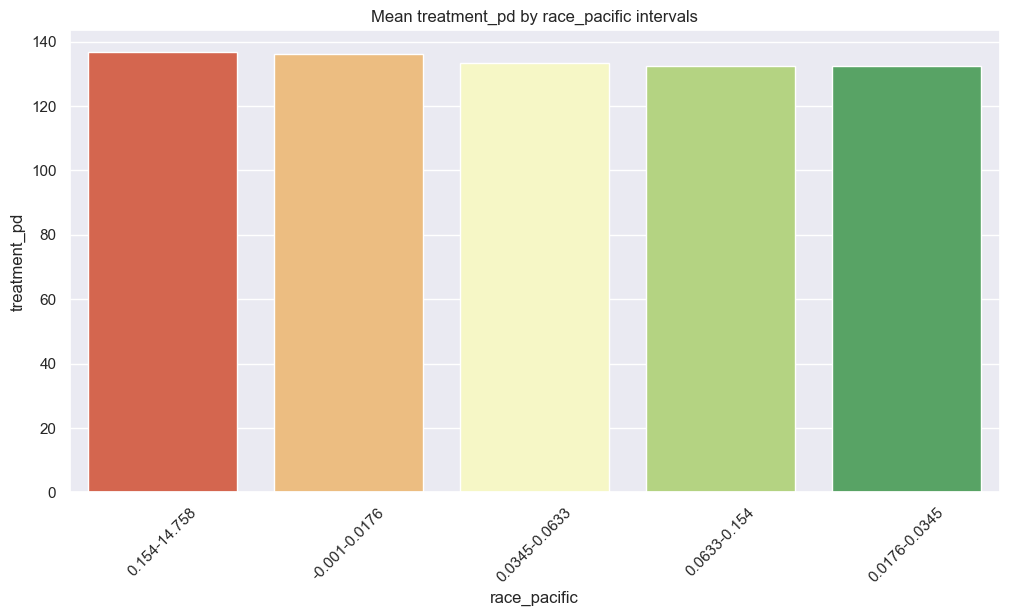

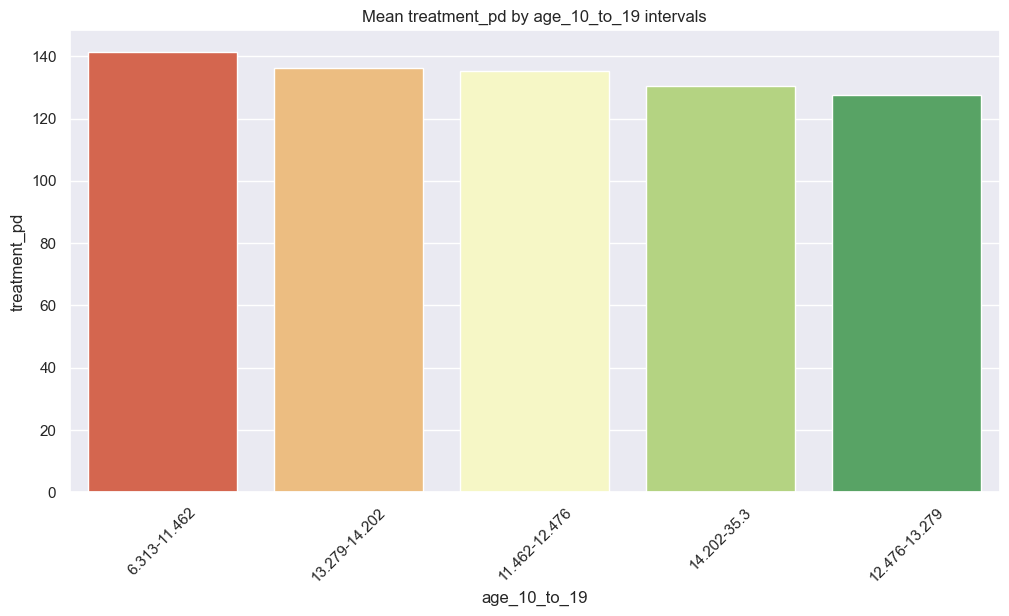

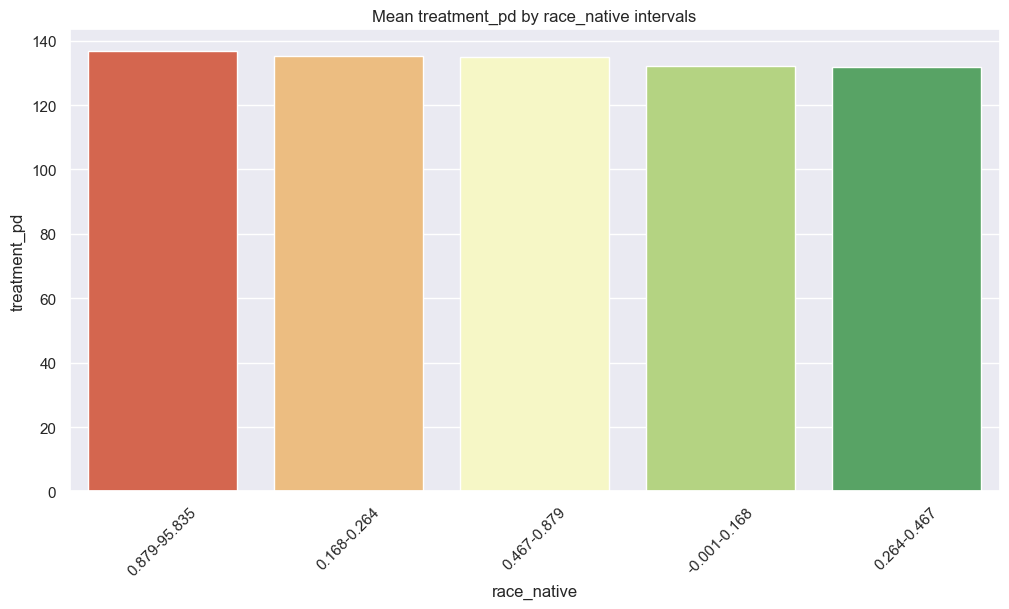

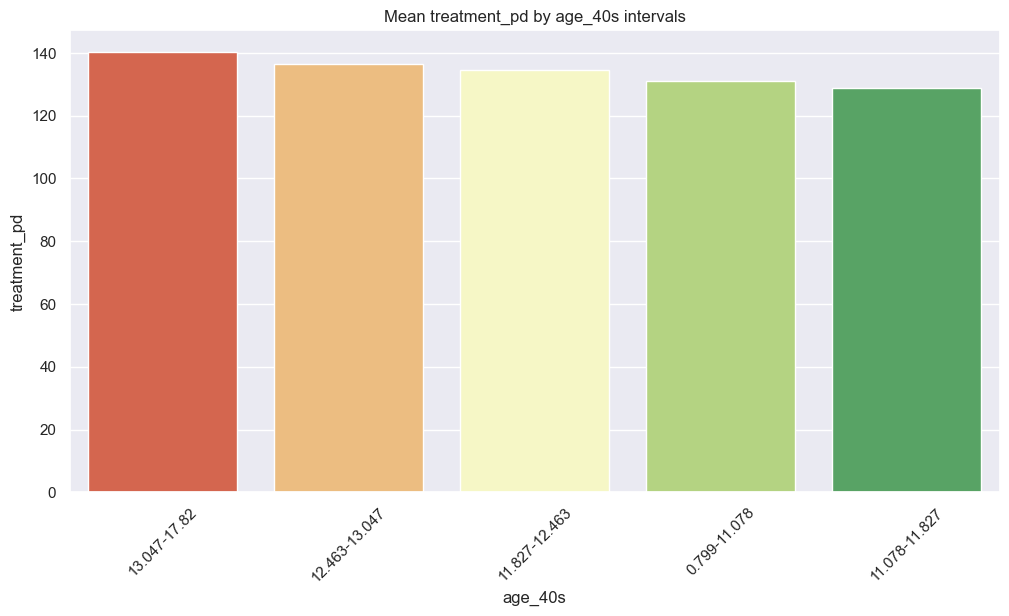

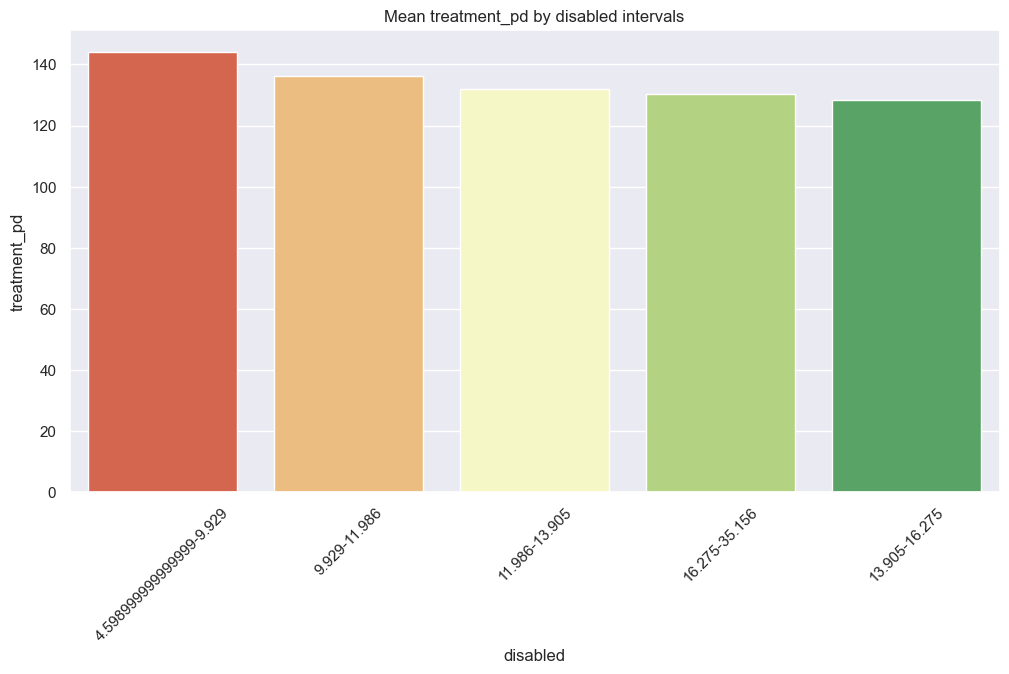

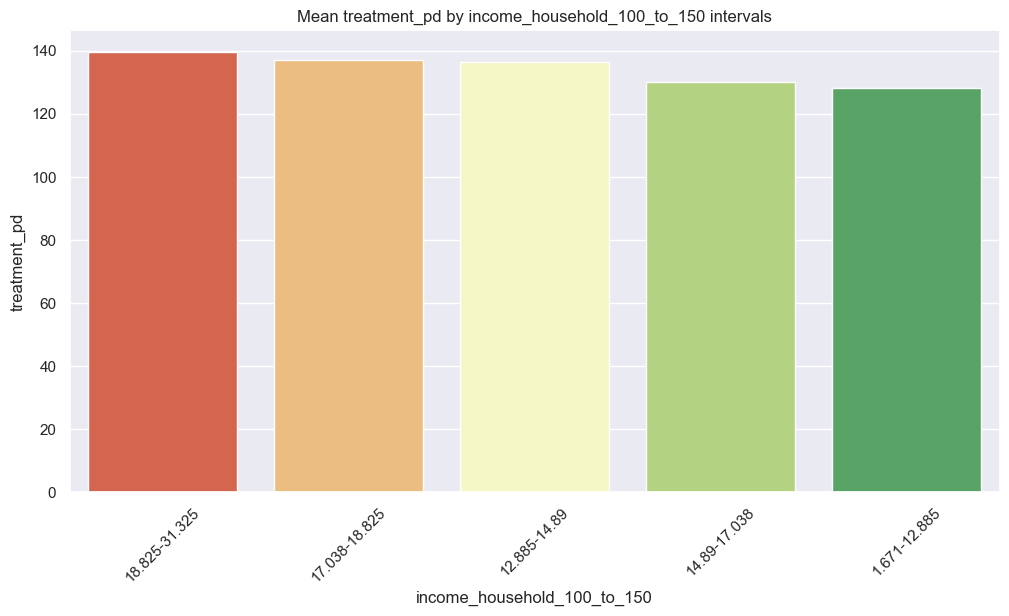

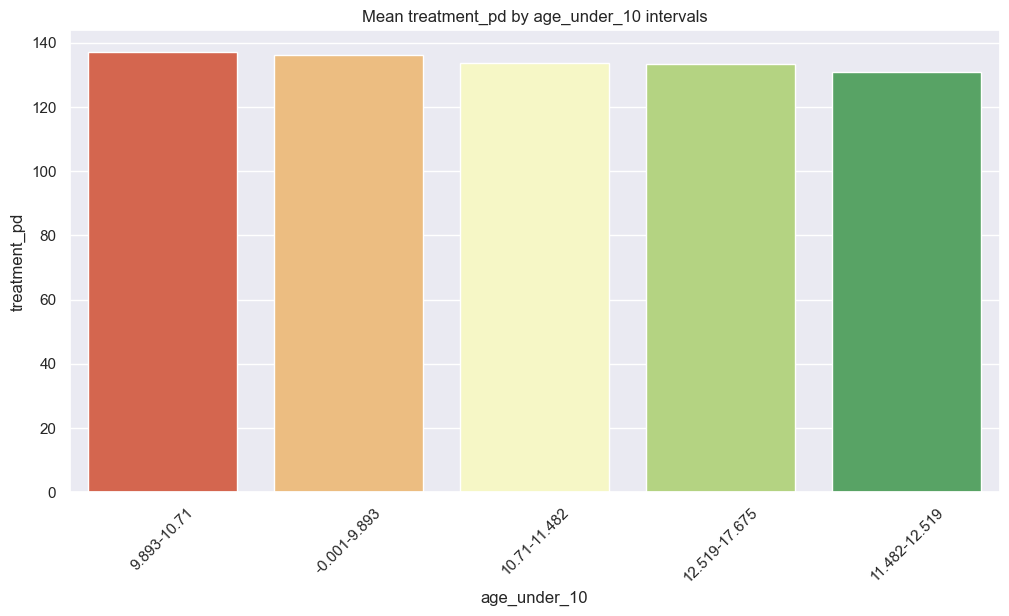

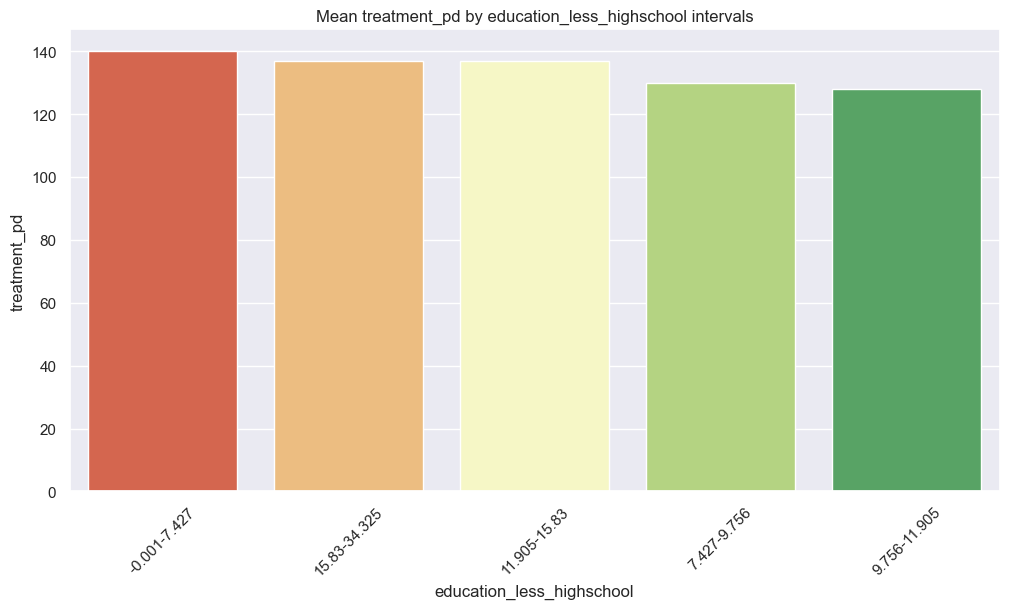

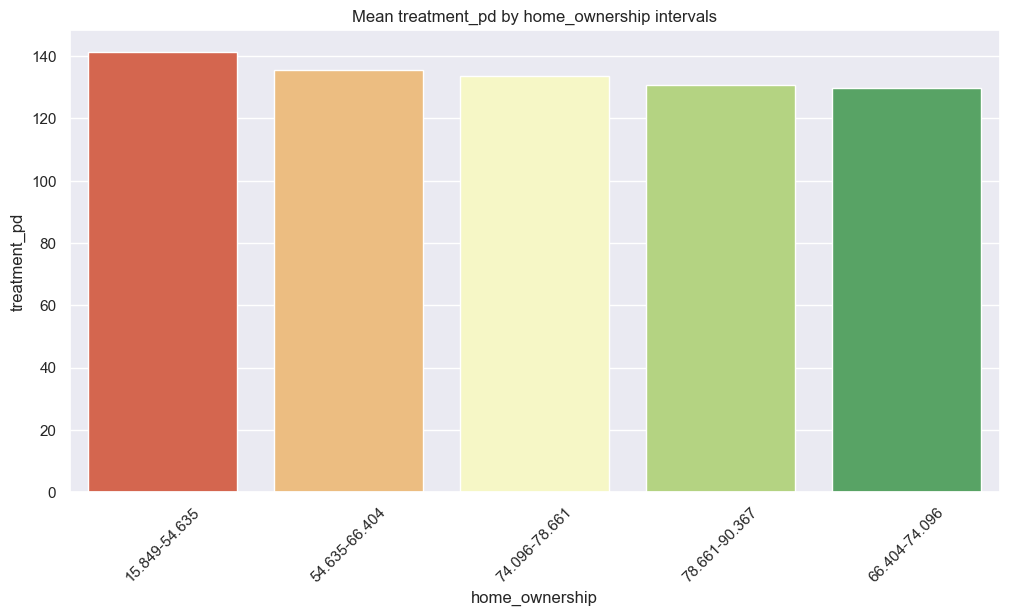

In [326]:
plot_numerical_features(train_data, feature_importance, target_column='treatment_pd', threshold=0.3)


In [ ]:
#Running model on train split in train adn test
#if __name__ == "__main__":
 #   predictions, important_features = main()